In [1]:
import pandas as pd
import nltk
import nltk.stem as ns
import string
import re
from collections import Counter
from nltk import sent_tokenize
from string import punctuation
from lexicalrichness import LexicalRichness


In [2]:
urbdict = pd.read_csv('urbandict-word-defs.csv', error_bad_lines=False)

b'Skipping line 3692: expected 6 fields, saw 7\nSkipping line 5546: expected 6 fields, saw 7\nSkipping line 7198: expected 6 fields, saw 7\nSkipping line 9758: expected 6 fields, saw 7\nSkipping line 13350: expected 6 fields, saw 7\nSkipping line 20000: expected 6 fields, saw 7\nSkipping line 20088: expected 6 fields, saw 7\nSkipping line 21776: expected 6 fields, saw 8\nSkipping line 23826: expected 6 fields, saw 8\nSkipping line 25255: expected 6 fields, saw 7\nSkipping line 25643: expected 6 fields, saw 7\nSkipping line 25777: expected 6 fields, saw 7\nSkipping line 30965: expected 6 fields, saw 7\nSkipping line 35485: expected 6 fields, saw 7\nSkipping line 36022: expected 6 fields, saw 8\nSkipping line 36072: expected 6 fields, saw 7\nSkipping line 40152: expected 6 fields, saw 7\nSkipping line 40695: expected 6 fields, saw 7\nSkipping line 41942: expected 6 fields, saw 7\nSkipping line 43660: expected 6 fields, saw 7\nSkipping line 46529: expected 6 fields, saw 7\nSkipping line 4

In [3]:
urbdict

word_id       word  up_votes  down_votes    author  \
0              7      Janky       296         255  dc397b2f   
1              8   slumpin'        16          37  dc397b2f   
2              9   yayeeyay        19          27  dc397b2f   
3             12  hard-core       162          96  d1610749   
4             13     brutal        12          45  40ece1ef   
...          ...        ...       ...         ...       ...   
2580581  9043521  Wikipedia         0           0  44335ab6   
2580582  9043525   Giuseppe         1           1  dc81c268   
2580583  9043541  pacewhore         0           0  b5e3ec68   
2580584  9043565        FML         1           0  bd352275   
2580585  9043586    Poptart         0           0  d6084af8   

                                                definition  
0                          Undesirable; less-than optimum.  
1        low down and funky, but [knee deep] enough to ...  
2        affirmation; suggestion of encouragement, appr...  
3        anything out of our league that can be good or...  
4                            anything that makes you sweat  
...                                                    ...  
2580581  An online encyclopedia. This site is often not...  
2580582              An annoying person but a good friend.  
2580583           Very fit and loving cat with a huge tail  
2580584                         Short for: Forgive me Lord  
2580585  Someone who is sweet and nice on the outside a...  

[2580586 rows x 6 columns]

In [4]:
urbdict.sort_values(by=['up_votes'], ascending=False, inplace=True, ignore_index=True)
urbdict

word_id              word  up_votes  down_votes    author  \
0        1539760               sex    289002       79134  3624fb48   
1        7910405         cartossin    270206      100377  c5a1894f   
2        2705928           hipster    182625       42696  8a5ef3c3   
3        2001939            nigger    110245       20986  e618b258   
4        1146634               sex    108716       57510  5ed4dfd3   
...          ...               ...       ...         ...       ...   
2580581  5336588             idmod        -1           1  6fda7a1b   
2580582   723096            pricey        -2           4  db15cb27   
2580583  8066221            Genius        -2           5  6db49cd3   
2580584   682961            nieger       -12          -7  177f4d5c   
2580585  8624323  50 shades of ass       -42         -12  c8aeda07   

                                                definition  
0        What kind of moron are you that you look up se...  
1        The act of giving up on both physical and ment...  
2        Hipsters are a subculture of men and women typ...  
3                                     A fully grown niglet  
4        sex is like math: you add the bed, subtract th...  
...                                                    ...  
2580581  A modified idiot. In other words, someone that...  
2580582  when somethin seems expensive 2 u, when u wann...  
2580583  Someone who spends little to no time studying,...  
2580584  a person who wants to be black, but isn't very...  
2580585  To suck bad at whatever you're doing at the mo...  

[2580586 rows x 6 columns]

In [5]:
urbdict = urbdict[urbdict['up_votes'] >= 10000]

In [6]:
urbdict

word_id       word  up_votes  down_votes    author  \
0    1539760        sex    289002       79134  3624fb48   
1    7910405  cartossin    270206      100377  c5a1894f   
2    2705928    hipster    182625       42696  8a5ef3c3   
3    2001939     nigger    110245       20986  e618b258   
4    1146634        sex    108716       57510  5ed4dfd3   
..       ...        ...       ...         ...       ...   
790  7613730   lip bite     10025        8649   f3769ec   
791  6894345  sex story     10024        8820  d222d424   
792   296407        BFD     10017        2588  bac1fe5a   
793   977454      holla     10016        3354  80fbc286   
794   145062      Queef     10003        5249  f979296a   

                                            definition  
0    What kind of moron are you that you look up se...  
1    The act of giving up on both physical and ment...  
2    Hipsters are a subculture of men and women typ...  
3                                 A fully grown niglet  
4    sex is like math: you add the bed, subtract th...  
..                                                 ...  
790                   A cute thing that a girl can do.  
791                                  a story about sex  
792                                   Big Fucking Deal  
793  1. A word used to acknowledge the presence of ...  
794  queef (kweef) n. ;; the expulsion of air from ...  

[795 rows x 6 columns]

In [7]:
profanity_df = pd.read_csv('profanity_en.csv')
profanity_df.head()

text canonical_form_1 canonical_form_2 canonical_form_3  \
0         69               69              NaN              NaN   
1        @55              ass              NaN              NaN   
2   @ssfcker             fuck              ass              NaN   
3  @ssfucker             fuck              ass              NaN   
4  @ssfvcker             fuck              ass              NaN   

                     category_1                   category_2 category_3  \
0  sexual anatomy / sexual acts                          NaN        NaN   
1  sexual anatomy / sexual acts                          NaN        NaN   
2  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
3  sexual anatomy / sexual acts  sexual orientation / gender        NaN   
4  sexual anatomy / sexual acts  sexual orientation / gender        NaN   

   severity_rating severity_description  
0              1.0                 Mild  
1              1.0                 Mild  
2              2.8               Severe  
3              2.8               Severe  
4              2.4               Strong

In [8]:
list(profanity_df.category_1.unique())

['sexual anatomy / sexual acts',
 'bodily fluids / excrement',
 'sexual orientation / gender',
 'racial / ethnic slurs',
 'other / general insult',
 'mental disability',
 'political',
 'animal references',
 'physical attributes',
 'religious offense',
 'physical disability']

In [9]:
profane_dict = {}

for word, category in zip (list(profanity_df.text.values), list(profanity_df.category_1.values)):
    profane_dict[word] = category

In [10]:
profane_dict

{'69': 'sexual anatomy / sexual acts',
 '@55': 'sexual anatomy / sexual acts',
 '@ssfcker': 'sexual anatomy / sexual acts',
 '@ssfucker': 'sexual anatomy / sexual acts',
 '@ssfvcker': 'sexual anatomy / sexual acts',
 '@sshole': 'sexual anatomy / sexual acts',
 '0ral seks': 'sexual anatomy / sexual acts',
 '0ral sex': 'sexual anatomy / sexual acts',
 '0rg@sm': 'sexual anatomy / sexual acts',
 '0rgasms': 'sexual anatomy / sexual acts',
 '3jakulating': 'sexual anatomy / sexual acts',
 '4r5e': 'sexual anatomy / sexual acts',
 '4r5ed': 'sexual anatomy / sexual acts',
 '4r5es': 'sexual anatomy / sexual acts',
 '4skin': 'sexual anatomy / sexual acts',
 '5h17': 'bodily fluids / excrement',
 '5h1t': 'bodily fluids / excrement',
 '5kank': 'sexual orientation / gender',
 'a_s_s': 'sexual anatomy / sexual acts',
 'abbie': 'racial / ethnic slurs',
 'abeed': 'racial / ethnic slurs',
 'aboe': 'racial / ethnic slurs',
 'anal': 'sexual anatomy / sexual acts',
 'anal hole': 'sexual anatomy / sexual acts

In [11]:
urb_words = [str(word).lower() for word in list(urbdict['word'].values)]

In [12]:
urb_words

['sex',
 'cartossin',
 'hipster',
 'nigger',
 'sex',
 'sex',
 'slut',
 'love',
 'woody',
 'gate rape',
 'pussy',
 'emo',
 'sex',
 'cunt',
 'fuck',
 'nigger',
 'penis',
 'nigga',
 'swag',
 'blowjob',
 'love',
 'nigger',
 'muslim',
 'feminist',
 'vagina',
 'emo',
 'orgasm',
 'weed',
 'penis',
 'sex',
 'lol',
 'ass',
 'ratchet',
 'urban dictionary',
 'feminism',
 'feminist',
 'nerd',
 'sex',
 'feminist',
 'sex',
 'porn',
 'feminism',
 'obama',
 'michael',
 'feminist',
 'gay',
 'feminism',
 'feminism',
 'feminist',
 'feminism',
 'feminist',
 'feminist',
 'feminism',
 'nextgenupdate',
 'dirty sanchez',
 'pussy',
 'emo',
 'jesus',
 'shit',
 'skeet',
 'ratchet',
 'slut',
 'bae',
 'santorum',
 'donkey punch',
 "that's what bp said",
 'feminism ',
 '4chan',
 'chode',
 'justin bieber',
 'milf',
 'penis',
 'cunt',
 'pussy',
 'truffle butter',
 'sexy',
 'fag',
 'marijuana',
 '420',
 'orgasm',
 'horny',
 'fuck',
 'god',
 'love',
 'yolo',
 'fuck boy',
 'horny',
 'nigga',
 'double rainbow',
 'lol',
 

In [13]:
punctuation_dict = {'.':'period', ',':'comma', ':':'colon', 
                    ';':'semicolon', '?':'question mark', 
                    '!':'exclamation mark', '-':'dash', "'": 'apostrophe',
                    '(':'open parenthesis', ')':'close parenthesis'}

In [14]:
ps = ns.PorterStemmer()
lemma = ns.WordNetLemmatizer()
from sacremoses import MosesTokenizer
mt = MosesTokenizer('en')

from profanity_check import predict, predict_prob



from nltk.tokenize import word_tokenize, sent_tokenize
def remove_punctuation(x):
    punctuation = string.punctuation
    no_punct = "".join([word for word in x if word not in punctuation])
    return no_punct

def remove_stopwords(x):
    stopwords = nltk.corpus.stopwords.words('english')
    no_sw = [word for word in x if word not in stopwords]
    return no_sw

#function built to use either stemming or lematization
def lemmatize(x):
    lemmatized = [lemma.lemmatize(word) for word in x]
    return lemmatized


#all of those functions inside one function to keep code clean
def clean_data(x):
    #tokens = re.sub("[^a-zA-Z]", " ", x.lower())
    essay_v = re.sub("[^a-zA-Z0-9]+", " ", x)
    tokens = essay_v.lower().split()
    no_sw = remove_stopwords(tokens)
    #root = lemmatize(no_sw)
    cleaned = ' '.join(no_sw)
    return cleaned

def clean_tokenize(x):
    #tokens = re.sub("[^a-zA-Z]", " ", x.lower())
    tokens = word_tokenize(x.lower())
    no_sw = remove_stopwords(tokens)
    root = lemmatize(no_sw)
    return root



def count_unique(x):
    counts = Counter(x)
    unique = sum(value == 1 for value in counts.values())
    return unique

def punc_percenatage(x):
    punctuation = string.punctuation
    return len([c for c in x if c in punctuation])/len(word_tokenize(x))

def lexical_richness(x):
    lex = LexicalRichness(x)
    return lex.mtld()

def internet_slang_w(x):
    x = [w.lower() for w in x]#removes non alphabet, undercase, then splits
    return len([word for word in x if  word in urb_words])/len(x)
    


profane_dict = {}

for word, category in zip (list(profanity_df.text.values), list(profanity_df.category_1.values)):
    profane_dict[word.lower()] = category

    
def informalities(x):
    x = [w.lower() for w in x['tokens']]
    pro_cats = [profane_dict[word] for word in x if word in profane_dict.keys()]
    pro_cats_dic = {}
    for word in list(list(profanity_df.category_1.unique())):
        pro_cats_dic[word] = pro_cats.count(word)/len(x)

    #'sexual anatomy / sexual acts', 'bodily fluids / excrement', 'sexual orientation / gender', 'racial / ethnic slurs', 'other / general insult', 'mental disability', 'political', 'animal references', 'physical attributes', 'religious offense', 'physical disability'
    return tuple(pro_cats_dic.values())

    
    
def cap_words(x):
    return sum(word.isupper() for word in x)/len(x)

punctuation_dict = {'.':'period', ',':'comma', ':':'colon', 
                    ';':'semicolon', '?':'question mark', 
                    '!':'exclamation mark', '-':'dash', "'": 'apostrophe',
                    '(':'open parenthesis', ')':'close parenthesis'}

def i_punc_perc(x):
    puncs = [punctuation_dict[punc] for punc in x['Statement'] if punc in punctuation_dict.keys()]

    punc_count_dic = {}
    for punc in list(punctuation_dict.values()):
        punc_count_dic[punc] = puncs.count(punc)/len(word_tokenize(x['Statement']))

    #period, comma, colon, semicolon, question mark, exclamation mark, dash, apostrophe, open parenthesis, close parenthesis
    return tuple(punc_count_dic.values())
    

#POS TAGS
def pos_noun(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'NNP' or value[1] == 'NNS' or value[1] == 'NNPS' or value[1] == 'NN' for value in tags)
    return count/len(tags)


#edited
#verbs

#base, present, present 3rd, past participle, past tense
    #present
def pos_verb(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'VB' for value in tags)
    return count/len(tags)

def pos_verb_present(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'VBG' for value in tags)
    return count/len(tags)

def pos_verb_present_3rd(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'VBP' for value in tags)
    return count/len(tags)

    #past tense
def pos_verb_past_part(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'VBN' for value in tags)
    return count/len(tags)

def pos_verb_past_tense(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'VBD' for value in tags)
    return count/len(tags)

def pos_all_verbs(x):
    v = pos_verb(x['Statement'])
    vp = pos_verb_present(x['Statement'])
    vp3 = pos_verb_present_3rd(x['Statement'])
    vpp = pos_verb_past_part(x['Statement'])
    vpt = pos_verb_past_tense(x['Statement'])

    return v, vp, vp3, vpp, vpt

#pronouns
def pos_pronoun_personal(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'PRP' for value in tags)
    return count/len(tags)

def pos_pronoun_possessive(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'PRP$' for value in tags)
    return count/len(tags)

def pos_pronoun_wh(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'WP' for value in tags)
    return count/len(tags)

# personal, possessive, wh
def pos_all_pnouns(x):
    pper = pos_pronoun_personal(x['Statement'])
    ppos = pos_pronoun_possessive(x['Statement'])
    pw = pos_pronoun_wh(x['Statement'])

    return pper, ppos, pw
#adverbs
def pos_adverb(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'RB' for value in tags)
    return count/len(tags)

def pos_adverb_comp(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'RBR' for value in tags)
    return count/len(tags)

def pos_adverb_super(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'RBS' for value in tags)
    return count/len(tags)

def pos_adverb_wh(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'WRB' for value in tags)
    return count/len(tags)
#base, comparative, superlative, wh
def pos_all_adv(x):
    pa = pos_adverb(x['Statement'])
    pac = pos_adverb_comp(x['Statement'])
    pas = pos_adverb_super(x['Statement'])
    paw = pos_adverb_wh(x['Statement'])

    return pa, pac, pas, paw

def pos_interjection(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'UH' for value in tags)
    return count/len(tags)

#adjectives

def pos_adjective(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'JJ' for value in tags)
    return count/len(tags)

def pos_adj_comp(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'JJR' for value in tags)
    return count/len(tags)

def pos_adj_super(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'JJS' for value in tags)
    return count/len(tags)

#base, comparative, superlative
def pos_all_adj(x):
    padj = pos_adjective(x['Statement'])
    padjc = pos_adj_comp(x['Statement'])
    padjs = pos_adj_super(x['Statement'])

    return padj, padjc, padjs


def pos_determiner(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'DT' for value in tags)
    return count/len(tags)

def pos_foreign(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'FW' for value in tags)
    return count/len(tags)

#added preposition/conjunction, interjection, modal auxilliary, numerical

def pos_prep_conj(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'IN' for value in tags)
    return count/len(tags)

def pos_interjection(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'UH' for value in tags)
    return count/len(tags)

def pos_md(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'MD' for value in tags)
    return count/len(tags)

def pos_num(x):
    tags = nltk.pos_tag(word_tokenize(x))
    count = sum(value[1] == 'CD' for value in tags)
    return count/len(tags)   


import text2emotion as te
#'Happy', 'Angry', 'Surprise', 'Sad', 'Fear'
def text2emotion(x):
    emotions = te.get_emotion(' '.join(x['cleaned']))
    return tuple(emotions.values())


def remove_pubDate(x):
    if 'Published On' in x:
        return x[:-35].replace(u'\xad', u'')
    else:
        return x
    
def profanity(x):
    return predict_prob([x])[0]


c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfTransformer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator TfidfVectorizer from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\cvaal\anaconda3\lib\site-packages\sklearn\base.py:329: UserWarning: Trying to unpickle estimator LinearSVC from version 1.0.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use a

In [15]:
df = pd.read_csv('Scraped_English_Headlines.csv')
print(df.shape)
df.drop_duplicates(keep='first', inplace=True)
print(df.shape)
df.head()


(6548, 2)
(6548, 2)


Statement Rating
0  Changing our clocks is a health hazard. Just a...   Real
1  How the Alec Baldwin fatal film set shooting u...   Real
2  A 90-year-old tortoise named Mr. Pickles just ...   Real
3  Alabama governor ousts a top education officia...   Real
4  2 people are dead, 20 missing, as a migrant bo...   Real

In [16]:
# #df['Statement'] = df['Statement'].apply(lambda x : remove_pubDate(x))
# df['cleaned'] = df['Statement'].apply(lambda x : clean_data(x))
# df['cleaned tokenized'] = df['Statement'].apply(lambda x : clean_tokenize(x))
# df['tokens'] = df['Statement'].apply(lambda x : word_tokenize(x))
# df['statement length'] = df['Statement'].apply(lambda x: len(mt.tokenize(x)))
# df['word count'] = df['cleaned'].apply(lambda x: len(x))
# df['sentence count'] = df['Statement'].apply(lambda x:len(sent_tokenize(x)))
# df['unique words'] = df['tokens'].apply(lambda x: count_unique(x))
# df['lexical richness'] = df['Statement'].apply(lambda x: lexical_richness(x))
# df['punctuation count'] = df['Statement'].apply(lambda x: punc_percenatage(x))

# df['capitalized words%'] = df['tokens'].apply(lambda x: cap_words(x))


# #'period%', 'comma%', 'colon%', 'semicolon%', 'question mark%', 'exclamation mark%', 'dash%', 'apostrophe%', 'open parenthesis%', 'close parenthesis%'
# df[['period%', 'comma%', 'colon%', 
#     'semicolon%', 'question mark%', 
#     'exclamation mark%', 'dash%', 'apostrophe%', 
#     'open parenthesis%', 'close parenthesis%']] = df.apply(i_punc_perc, axis=1, result_type="expand")



# df['noun%'] = df['Statement'].apply(lambda x: pos_noun(x))

# #base, present, present 3rd, past participle, past tense
# df[['verbs%', 'present verbs%', 'present 3rd verbs%', 'past participle verbs%', 'past tense verbs']] = df.apply(pos_all_verbs, axis=1, result_type="expand")

# # personal, possessive, wh
# df[['personal pronouns%', 'possessive pronouns%', 'wh pronouns%']] = df.apply(pos_all_pnouns, axis=1, result_type="expand")

# #base, comparative, superlative, wh
# df[['adverbs%', 'comparative adverbs%', 'superlative adverbs%', 'wh adverbs%']] = df.apply(pos_all_adv, axis=1, result_type="expand")

# #base, comparative, superlative
# df[['adjectives%', 'comparative adjectives%', 'superlative adjectives%']] = df.apply(pos_all_adj, axis=1, result_type="expand")


# df['determiner%'] = df['Statement'].apply(lambda x: pos_determiner(x))
# df['foreign%'] = df['Statement'].apply(lambda x: pos_foreign(x))

# #preposition/conjunction, interjection, modal auxilliary, numerical
# df['preposition/conjunction%'] = df['Statement'].apply(lambda x: pos_prep_conj(x))
# df['interjection%'] = df['Statement'].apply(lambda x: pos_interjection(x))
# df['modal auxilliary%'] = df['Statement'].apply(lambda x: pos_md(x))
# df['numerical%'] = df['Statement'].apply(lambda x: pos_num(x))

# df[['Happy', 'Angry', 
#     'Surprise', 'Sad', 
#     'Fear']] = df.apply(text2emotion, axis=1, result_type="expand")


# df['profanity_level'] = df['Statement'].apply(lambda x: profanity(x))

# #'sexual anatomy / sexual acts', 'bodily fluids / excrement', 'sexual orientation / gender', 'racial / ethnic slurs', 'other / general insult', 'mental disability', 'political', 'animal references', 'physical attributes', 'religious offense', 'physical disability'
# df['internet slang'] = df['tokens'].apply(lambda x: internet_slang_w(x))

# df[['sexual anatomy / sexual acts', 'bodily fluids / excrement', 
#     'sexual orientation / gender', 'racial / ethnic slurs', 
#     'other / general insult', 'mental disability', 
#     'political', 'animal references', 'physical attributes', 
#     'religious offense', 'physical disability']] = df.apply(informalities, axis=1, result_type="expand")

In [17]:
#df['Statement'] = df['Statement'].apply(lambda x : remove_pubDate(x))
df['cleaned'] = df['Statement'].apply(lambda x : clean_data(x))
df['cleaned tokenized'] = df['Statement'].apply(lambda x : clean_tokenize(x))
df['tokens'] = df['Statement'].apply(lambda x : word_tokenize(x))
df['statement length'] = df['Statement'].apply(lambda x: len(mt.tokenize(x)))
df['word count'] = df['cleaned'].apply(lambda x: len(x))
df['sentence count'] = df['Statement'].apply(lambda x:len(sent_tokenize(x)))
df['unique words'] = df['tokens'].apply(lambda x: count_unique(x))
df['lexical richness'] = df['Statement'].apply(lambda x: lexical_richness(x))
df['punctuation count'] = df['Statement'].apply(lambda x: punc_percenatage(x))

df['capitalized words%'] = df['tokens'].apply(lambda x: cap_words(x))

In [18]:
#'period%', 'comma%', 'colon%', 'semicolon%', 'question mark%', 'exclamation mark%', 'dash%', 'apostrophe%', 'open parenthesis%', 'close parenthesis%'
df[['period%', 'comma%', 'colon%', 
    'semicolon%', 'question mark%', 
    'exclamation mark%', 'dash%', 'apostrophe%', 
    'open parenthesis%', 'close parenthesis%']] = df.apply(i_punc_perc, axis=1, result_type="expand")

In [19]:
df['noun%'] = df['Statement'].apply(lambda x: pos_noun(x))
#base, present, present 3rd, past participle, past tense
df[['verbs%', 'present verbs%', 'present 3rd verbs%', 'past participle verbs%', 'past tense verbs']] = df.apply(pos_all_verbs, axis=1, result_type="expand")
# personal, possessive, wh
df[['personal pronouns%', 'possessive pronouns%', 'wh pronouns%']] = df.apply(pos_all_pnouns, axis=1, result_type="expand")
#base, comparative, superlative, wh
df[['adverbs%', 'comparative adverbs%', 'superlative adverbs%', 'wh adverbs%']] = df.apply(pos_all_adv, axis=1, result_type="expand")
#base, comparative, superlative
df[['adjectives%', 'comparative adjectives%', 'superlative adjectives%']] = df.apply(pos_all_adj, axis=1, result_type="expand")

: 

: 

In [ ]:
df['determiner%'] = df['Statement'].apply(lambda x: pos_determiner(x))
df['foreign%'] = df['Statement'].apply(lambda x: pos_foreign(x))

#preposition/conjunction, interjection, modal auxilliary, numerical
df['preposition/conjunction%'] = df['Statement'].apply(lambda x: pos_prep_conj(x))
df['interjection%'] = df['Statement'].apply(lambda x: pos_interjection(x))
df['modal auxilliary%'] = df['Statement'].apply(lambda x: pos_md(x))
df['numerical%'] = df['Statement'].apply(lambda x: pos_num(x))

In [ ]:
df[['sexual anatomy / sexual acts', 'bodily fluids / excrement', 
    'sexual orientation / gender', 'racial / ethnic slurs', 
    'other / general insult', 'mental disability', 
    'political', 'animal references', 'physical attributes', 
    'religious offense', 'physical disability']] = df.apply(informalities, axis=1, result_type="expand")
#'sexual anatomy / sexual acts', 'bodily fluids / excrement', 'sexual orientation / gender', 'racial / ethnic slurs', 'other / general insult', 'mental disability', 'political', 'animal references', 'physical attributes', 'religious offense', 'physical disability

df['internet slang'] = df['tokens'].apply(lambda x: internet_slang_w(x))

In [ ]:
df['profanity_level'] = df['Statement'].apply(lambda x: profanity(x))


In [ ]:
# df[['Happy', 'Angry', 
#     'Surprise', 'Sad', 
#     'Fear']] = df.apply(text2emotion, axis=1, result_type="expand")


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Rating'] = le.fit_transform(df.Rating.values)

In [ ]:
df

Statement  Rating  \
0     Changing our clocks is a health hazard. Just a...       1   
1     How the Alec Baldwin fatal film set shooting u...       1   
2     A 90-year-old tortoise named Mr. Pickles just ...       1   
3     Alabama governor ousts a top education officia...       1   
4     2 people are dead, 20 missing, as a migrant bo...       1   
...                                                 ...     ...   
6543  Health Ranger Report: Gregory Mannarino dubs c...       0   
6544  Trans Activist Threatens Women Who Try To Stop...       0   
6545  Justin Trudeau Announces $5.5 Million To ‘Cens...       0   
6546  Rasmussen final Generic Congressional Ballot: ...       0   
6547  Kevin McCarthy caves (as expected), appoints I...       0   

                                                cleaned  \
0        changing clocks health hazard ask sleep doctor   
1         alec baldwin fatal film set shooting unfolded   
2     90 year old tortoise named mr pickles became f...   
3     alabama governor ousts top education official ...   
4     2 people dead 20 missing migrant boat sinks co...   
...                                                 ...   
6543  health ranger report gregory mannarino dubs ce...   
6544  trans activist threatens women try stop using ...   
6545  justin trudeau announces 5 5 million censor in...   
6546  rasmussen final generic congressional ballot 4...   
6547  kevin mccarthy caves expected appoints ilhan o...   

                                      cleaned tokenized  \
0     [changing, clock, health, hazard, ., ask, slee...   
1     [alec, baldwin, fatal, film, set, shooting, un...   
2     [90-year-old, tortoise, named, mr., pickle, be...   
3     [alabama, governor, ousts, top, education, off...   
4     [2, people, dead, ,, 20, missing, ,, migrant, ...   
...                                                 ...   
6543  [health, ranger, report, :, gregory, mannarino...   
6544  [trans, activist, threatens, woman, try, stop,...   
6545  [justin, trudeau, announces, $, 5.5, million, ...   
6546  [rasmussen, final, generic, congressional, bal...   
6547  [kevin, mccarthy, cave, (, expected, ), ,, app...   

                                                 tokens  statement length  \
0     [Changing, our, clocks, is, a, health, hazard,...                13   
1     [How, the, Alec, Baldwin, fatal, film, set, sh...                 9   
2     [A, 90-year-old, tortoise, named, Mr., Pickles...                19   
3     [Alabama, governor, ousts, a, top, education, ...                17   
4     [2, people, are, dead, ,, 20, missing, ,, as, ...                18   
...                                                 ...               ...   
6543  [Health, Ranger, Report, :, Gregory, Mannarino...                17   
6544  [Trans, Activist, Threatens, Women, Who, Try, ...                14   
6545  [Justin, Trudeau, Announces, $, 5.5, Million, ...                12   
6546  [Rasmussen, final, Generic, Congressional, Bal...                19   
6547  [Kevin, McCarthy, caves, (, as, expected, ), ,...                16   

      word count  sentence count  unique words  lexical richness  ...  \
0             46               2            11             40.32  ...   
1             45               1             9              9.00  ...   
2             62               2            17             35.84  ...   
3             69               1            14             63.00  ...   
4             57               1            16             14.00  ...   
...          ...             ...           ...               ...  ...   
6543         108               1            15             71.68  ...   
6544          55               1            14             12.00  ...   
6545          61               1            12              8.00  ...   
6546          84               1            14             33.88  ...   
6547          81               1            16             13.00  ...   

      racial / ethnic

In [ ]:
df.columns

Index(['Statement', 'Rating', 'cleaned', 'cleaned tokenized', 'tokens',
       'statement length', 'word count', 'sentence count', 'unique words',
       'lexical richness', 'punctuation count', 'capitalized words%',
       'period%', 'comma%', 'colon%', 'semicolon%', 'question mark%',
       'exclamation mark%', 'dash%', 'apostrophe%', 'open parenthesis%',
       'close parenthesis%', 'noun%', 'verbs%', 'present verbs%',
       'present 3rd verbs%', 'past participle verbs%', 'past tense verbs',
       'personal pronouns%', 'possessive pronouns%', 'wh pronouns%',
       'adverbs%', 'comparative adverbs%', 'superlative adverbs%',
       'wh adverbs%', 'adjectives%', 'comparative adjectives%',
       'superlative adjectives%', 'determiner%', 'foreign%',
       'preposition/conjunction%', 'interjection%', 'modal auxilliary%',
       'numerical%', 'sexual anatomy / sexual acts',
       'bodily fluids / excrement', 'sexual orientation / gender',
       'racial / ethnic slurs', 'other / gene

In [ ]:
df = df.loc[:, (df != 0).any(axis=0)]


In [ ]:
def generate_N_grams(text,ngram=1):
  words=[word.strip().lower() for word in text.split(" ") if word not in set(nltk.corpus.stopwords.words('english'))]  
  print("Sentence after removing stopwords:",words)
  temp=zip(*[words[i:] for i in range(0,ngram)])
  ans=[' '.join(ngram) for ngram in temp]
  return ans

df['bigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,2))

Sentence after removing stopwords: ['changing', 'clocks', 'health', 'hazard', 'ask', 'sleep', 'doctor']
Sentence after removing stopwords: ['alec', 'baldwin', 'fatal', 'film', 'set', 'shooting', 'unfolded']
Sentence after removing stopwords: ['90', 'year', 'old', 'tortoise', 'named', 'mr', 'pickles', 'became', 'father', '3', 'big', 'dill']
Sentence after removing stopwords: ['alabama', 'governor', 'ousts', 'top', 'education', 'official', 'book', 'woke', 'concepts', 'race']
Sentence after removing stopwords: ['2', 'people', 'dead', '20', 'missing', 'migrant', 'boat', 'sinks', 'coast', 'tunisia']
Sentence after removing stopwords: ['watch', 'rare', 'eclipse', 'thrills', 'crowds', 'remote', 'australia', 'town']
Sentence after removing stopwords: ['anti', 'drag', 'bills', 'sweeping', 'u', 'straight', 'history', 'playbook']
Sentence after removing stopwords: ['us', 'financial', 'institutions', 'hit', 'deposit', 'flight']
Sentence after removing stopwords: ['2', 'year', 'old', 'boy', 'found'

<ipython-input-111-e7b08ccfcea0>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['bigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,2))


In [ ]:
df['trigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,3))

Sentence after removing stopwords: ['changing', 'clocks', 'health', 'hazard', 'ask', 'sleep', 'doctor']
Sentence after removing stopwords: ['alec', 'baldwin', 'fatal', 'film', 'set', 'shooting', 'unfolded']
Sentence after removing stopwords: ['90', 'year', 'old', 'tortoise', 'named', 'mr', 'pickles', 'became', 'father', '3', 'big', 'dill']
Sentence after removing stopwords: ['alabama', 'governor', 'ousts', 'top', 'education', 'official', 'book', 'woke', 'concepts', 'race']
Sentence after removing stopwords: ['2', 'people', 'dead', '20', 'missing', 'migrant', 'boat', 'sinks', 'coast', 'tunisia']
Sentence after removing stopwords: ['watch', 'rare', 'eclipse', 'thrills', 'crowds', 'remote', 'australia', 'town']
Sentence after removing stopwords: ['anti', 'drag', 'bills', 'sweeping', 'u', 'straight', 'history', 'playbook']
Sentence after removing stopwords: ['us', 'financial', 'institutions', 'hit', 'deposit', 'flight']
Sentence after removing stopwords: ['2', 'year', 'old', 'boy', 'found'

<ipython-input-112-8c155d2eacd0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['trigrams'] = df['cleaned'].apply(lambda x: generate_N_grams(x,3))


In [1]:
df.to_csv('English_Headlines_EngFeatures.csv', index='False')
df.to_pickle('English_Headlines_EngFeatures.pkl')

NameError: name 'df' is not defined

In [4]:
import pandas as pd
df = pd.read_pickle('English_Headlines_EngFeatures.pkl')

In [5]:
df['bigrams']

0       [changing clocks, clocks health, health hazard...
1       [alec baldwin, baldwin fatal, fatal film, film...
2       [90 year, year old, old tortoise, tortoise nam...
3       [alabama governor, governor ousts, ousts top, ...
4       [2 people, people dead, dead 20, 20 missing, m...
                              ...                        
6543    [health ranger, ranger report, report gregory,...
6544    [trans activist, activist threatens, threatens...
6545    [justin trudeau, trudeau announces, announces ...
6546    [rasmussen final, final generic, generic congr...
6547    [kevin mccarthy, mccarthy caves, caves expecte...
Name: bigrams, Length: 6548, dtype: object

In [6]:
import numpy as np
import matplotlib.pyplot as plt

class BubbleChart:
    def __init__(self, area, bubble_spacing=0):
        area = np.asarray(area)
        r = np.sqrt(area / np.pi)

        self.bubble_spacing = bubble_spacing
        self.bubbles = np.ones((len(area), 4))
        self.bubbles[:, 2] = r
        self.bubbles[:, 3] = area
        self.maxstep = 2 * self.bubbles[:, 2].max() + self.bubble_spacing
        self.step_dist = self.maxstep / 2

        # calculate initial grid layout for bubbles
        length = np.ceil(np.sqrt(len(self.bubbles)))
        grid = np.arange(length) * self.maxstep
        gx, gy = np.meshgrid(grid, grid)
        self.bubbles[:, 0] = gx.flatten()[:len(self.bubbles)]
        self.bubbles[:, 1] = gy.flatten()[:len(self.bubbles)]

        self.com = self.center_of_mass()

    def center_of_mass(self):
        return np.average(
            self.bubbles[:, :2], axis=0, weights=self.bubbles[:, 3]
        )

    def center_distance(self, bubble, bubbles):
        return np.hypot(bubble[0] - bubbles[:, 0],
                        bubble[1] - bubbles[:, 1])

    def outline_distance(self, bubble, bubbles):
        center_distance = self.center_distance(bubble, bubbles)
        return center_distance - bubble[2] - bubbles[:, 2] - self.bubble_spacing

    def check_collisions(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        return len(distance[distance < 0])

    def collides_with(self, bubble, bubbles):
        distance = self.outline_distance(bubble, bubbles)
        idx_min = np.argmin(distance)
        return idx_min if type(idx_min) == np.ndarray else [idx_min]

    def collapse(self, n_iterations=50):

        for _i in range(n_iterations):
            moves = 0
            for i in range(len(self.bubbles)):
                rest_bub = np.delete(self.bubbles, i, 0)
                # try to move directly towards the center of mass
                # direction vector from bubble to the center of mass
                dir_vec = self.com - self.bubbles[i, :2]

                # shorten direction vector to have length of 1
                dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))

                # calculate new bubble position
                new_point = self.bubbles[i, :2] + dir_vec * self.step_dist
                new_bubble = np.append(new_point, self.bubbles[i, 2:4])

                # check whether new bubble collides with other bubbles
                if not self.check_collisions(new_bubble, rest_bub):
                    self.bubbles[i, :] = new_bubble
                    self.com = self.center_of_mass()
                    moves += 1
                else:
                    # try to move around a bubble that you collide with
                    # find colliding bubble
                    for colliding in self.collides_with(new_bubble, rest_bub):
                        # calculate direction vector
                        dir_vec = rest_bub[colliding, :2] - self.bubbles[i, :2]
                        dir_vec = dir_vec / np.sqrt(dir_vec.dot(dir_vec))
                        # calculate orthogonal vector
                        orth = np.array([dir_vec[1], -dir_vec[0]])
                        # test which direction to go
                        new_point1 = (self.bubbles[i, :2] + orth *
                                      self.step_dist)
                        new_point2 = (self.bubbles[i, :2] - orth *
                                      self.step_dist)
                        dist1 = self.center_distance(
                            self.com, np.array([new_point1]))
                        dist2 = self.center_distance(
                            self.com, np.array([new_point2]))
                        new_point = new_point1 if dist1 < dist2 else new_point2
                        new_bubble = np.append(new_point, self.bubbles[i, 2:4])
                        if not self.check_collisions(new_bubble, rest_bub):
                            self.bubbles[i, :] = new_bubble
                            self.com = self.center_of_mass()

            if moves / len(self.bubbles) < 0.1:
                self.step_dist = self.step_dist / 2

    def plot(self, ax, labels, colors):

        for i in range(len(self.bubbles)):
            circ = plt.Circle(
                self.bubbles[i, :2], self.bubbles[i, 2], color=colors[i])
            ax.add_patch(circ)
            ax.text(*self.bubbles[i, :2], labels[i],
                    horizontalalignment='center', verticalalignment='center')

In [7]:

from wordcloud import WordCloud, STOPWORDS


In [8]:
df_real = df[df['Rating'] == 1]
df_fake = df[df['Rating'] == 0]

In [9]:
df_real.Statement.str.count('published').sum()

0

In [10]:
real_news_words = []
fake_news_words = []
for l in df[df['Rating'] == 1]['cleaned'].values:
    l = [word for word in l.split() if word.isalpha()]
    for token in l:
        real_news_words.append(token)

for l in df[df['Rating'] == 0]['cleaned'].values:
    l = [word for word in l.split() if word.isalpha()]
    for token in l:
        fake_news_words.append(token)

In [11]:
real_news_words_freq = pd.Series(real_news_words).value_counts()[:16]
real_news_words_freq = pd.DataFrame(real_news_words_freq, columns=['Frequency'])
real_news_words_freq


Frequency
sudan          219
us             199
ukraine        161
says           143
russia         125
new            120
china          105
war             98
court           94
trump           91
article         90
biden           87
u               82
killed          76
police          71
india           68

In [31]:
fake_news_words_freq = pd.Series(fake_news_words).value_counts()[:16]
fake_news_words_freq = pd.DataFrame(fake_news_words_freq, columns=['Frequency'])
fake_news_words_freq

           Frequency
biden            266
trump            224
new              190
says             182
covid            156
us               103
man              103
world             96
woman             94
people            93
twitter           85
president         78
bill              72
u                 71
white             67
china             66


In [13]:
unique_to_real = pd.Series([word for word in real_news_words if word not in fake_news_words])
unique_to_real = unique_to_real.value_counts()[:16]
unique_to_real = pd.DataFrame(unique_to_real, columns=['Frequency'])
unique_to_real


Frequency
sudan           219
article          90
image            58
pakistan         32
israeli          30
al               29
khartoum         24
kenya            23
gallery          20
yemen            20
tunisia          19
rsf              17
ethiopia         16
aqsa             16
eid              15
jailed           14

In [14]:
unique_to_fake = pd.Series([word for word in fake_news_words if word not in real_news_words])
unique_to_fake = unique_to_fake.value_counts()[:16]
unique_to_fake = pd.DataFrame(unique_to_fake, columns=['Frequency'])
unique_to_fake 

Frequency
vaccines           45
democrat           43
wef                43
brighteon          40
fauci              33
pfizer             33
gates              30
clinton            29
hillary            29
jab                25
pelosi             23
jabs               22
censorship         22
censor             20
communist          19
walmart            17

In [15]:
def get_stats(df, col, rating):
    if rating == 1:
        rating = ('Real', 1)
    else:
        rating = ('Fake', 0)
    print(type(rating[1]))
    print(f'sum of all percentages of {col} in {rating[0]} headlines {(df[df["Rating"] == rating[1]][col].sum())}' )
    print(f'frequency of {col} in {rating[0]} headlines {sum((df[df["Rating"] == rating[1]][col] > 0).values)}' )
    print(f'{df[df["Rating"] == rating[1]][col].describe()}')

In [16]:
for i in df.columns.values:
    print(i)

Statement
Rating
cleaned
cleaned tokenized
tokens
statement length
word count
sentence count
unique words
lexical richness
punctuation count
capitalized words%
period%
comma%
colon%
semicolon%
question mark%
exclamation mark%
dash%
apostrophe%
open parenthesis%
close parenthesis%
noun%
verbs%
present verbs%
present 3rd verbs%
past participle verbs%
past tense verbs
personal pronouns%
possessive pronouns%
wh pronouns%
adverbs%
comparative adverbs%
superlative adverbs%
wh adverbs%
adjectives%
comparative adjectives%
superlative adjectives%
determiner%
foreign%
preposition/conjunction%
interjection%
modal auxilliary%
numerical%
sexual anatomy / sexual acts
bodily fluids / excrement
sexual orientation / gender
racial / ethnic slurs
animal references
internet slang
profanity_level
bigrams
trigrams


In [17]:
get_stats(df, 'exclamation mark%', 1)
get_stats(df, 'exclamation mark%', 0)

<class 'int'>
sum of all percentages of exclamation mark% in Real headlines 0.6049486461251168
frequency of exclamation mark% in Real headlines 7
count    3274.000000
mean        0.000185
std         0.004364
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.166667
Name: exclamation mark%, dtype: float64
<class 'int'>
sum of all percentages of exclamation mark% in Fake headlines 6.815053365045289
frequency of exclamation mark% in Fake headlines 95
count    3274.000000
mean        0.002082
std         0.012931
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.181818
Name: exclamation mark%, dtype: float64


In [18]:
get_stats(df, "numerical%", 1)
get_stats(df, "numerical%", 0)

<class 'int'>
sum of all percentages of numerical% in Real headlines 63.02343531941055
frequency of numerical% in Real headlines 633
count    3274.000000
mean        0.019250
std         0.042229
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.300000
Name: numerical%, dtype: float64
<class 'int'>
sum of all percentages of numerical% in Fake headlines 52.712464978314145
frequency of numerical% in Fake headlines 624
count    3274.000000
mean        0.016100
std         0.036418
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.250000
Name: numerical%, dtype: float64


In [19]:
get_stats(df, "lexical richness", 1)
get_stats(df, "lexical richness", 0)

<class 'int'>
sum of all percentages of lexical richness in Real headlines 46307.10363190731
frequency of lexical richness in Real headlines 3274
count    3274.000000
mean       14.143892
std        13.529622
min         2.000000
25%         8.000000
50%        10.000000
75%        13.000000
max       112.000000
Name: lexical richness, dtype: float64
<class 'int'>
sum of all percentages of lexical richness in Fake headlines 68036.58867038786
frequency of lexical richness in Fake headlines 3274
count    3274.000000
mean       20.780876
std        22.497651
min         4.000000
25%        10.000000
50%        13.000000
75%        16.000000
max       189.280000
Name: lexical richness, dtype: float64


In [20]:
get_stats(df, "capitalized words%", 1)
get_stats(df, "capitalized words%", 0)

<class 'int'>
sum of all percentages of capitalized words% in Real headlines 82.38572243030447
frequency of capitalized words% in Real headlines 831
count    3274.000000
mean        0.025164
std         0.047033
min         0.000000
25%         0.000000
50%         0.000000
75%         0.052632
max         0.285714
Name: capitalized words%, dtype: float64
<class 'int'>
sum of all percentages of capitalized words% in Fake headlines 134.0101546436353
frequency of capitalized words% in Fake headlines 1280
count    3274.000000
mean        0.040932
std         0.078010
min         0.000000
25%         0.000000
50%         0.000000
75%         0.071429
max         1.000000
Name: capitalized words%, dtype: float64


In [21]:
get_stats(df, "question mark%", 1)
get_stats(df, "question mark%", 0)

<class 'int'>
sum of all percentages of question mark% in Real headlines 15.481353201322243
frequency of question mark% in Real headlines 178
count    3274.000000
mean        0.004729
std         0.020528
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.200000
Name: question mark%, dtype: float64
<class 'int'>
sum of all percentages of question mark% in Fake headlines 6.472121093293021
frequency of question mark% in Fake headlines 90
count    3274.000000
mean        0.001977
std         0.012493
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.142857
Name: question mark%, dtype: float64


In [22]:
get_stats(df, "internet slang", 1)
get_stats(df, "internet slang", 0)

<class 'int'>
sum of all percentages of internet slang in Real headlines 32.13739640562396
frequency of internet slang in Real headlines 330
count    3274.000000
mean        0.009816
std         0.032050
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.333333
Name: internet slang, dtype: float64
<class 'int'>
sum of all percentages of internet slang in Fake headlines 62.18841521337889
frequency of internet slang in Fake headlines 744
count    3274.000000
mean        0.018995
std         0.039742
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.428571
Name: internet slang, dtype: float64


In [127]:
def wordcloud_generator(data, file_name):
    stopwords = set(STOPWORDS) 
    text = ' '
    for x in data.Statement: 
        
        # typecaste each val to string 
        x = str(x) 
    
        # split the value 
        values = x.split() 
        
        # Converts each token into lowercase 
        for i in range(len(values)): 
            values[i] = values[i].lower() 
            
        for words in values: 
            text = text + words + ' '
    
    
    wc = WordCloud(max_words= 100,
                        width = 744, 
                        height = 544,
                        background_color ='white',
                        stopwords=stopwords, 
                        contour_width=3, 
                        contour_color='steelblue',
                        min_font_size = 10).generate(text) 
    
    # plot the WordCloud image                        
    plt.figure(figsize = (14, 14)) 
    plt.imshow(wc) 
    plt.axis("off")
    plt.savefig(file_name)

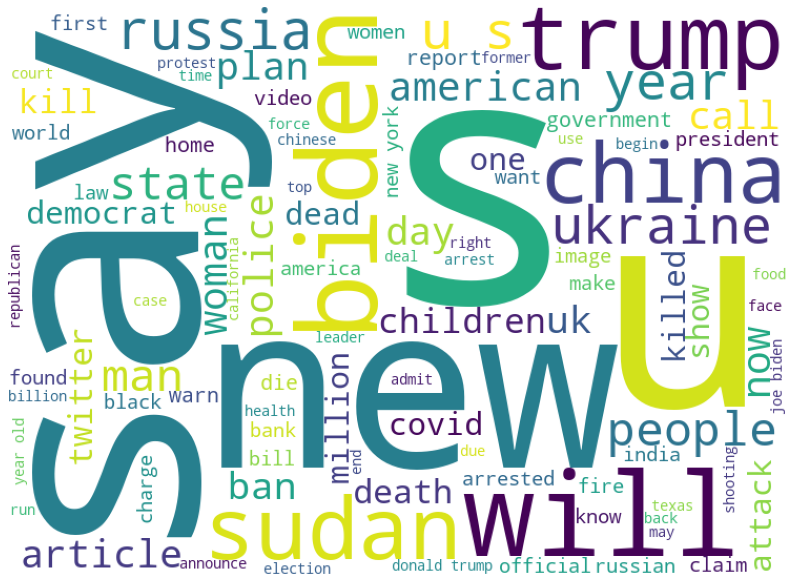

In [128]:
wordcloud_generator(df, 'Visualizations/ALL_headlines_wordcloud.png')


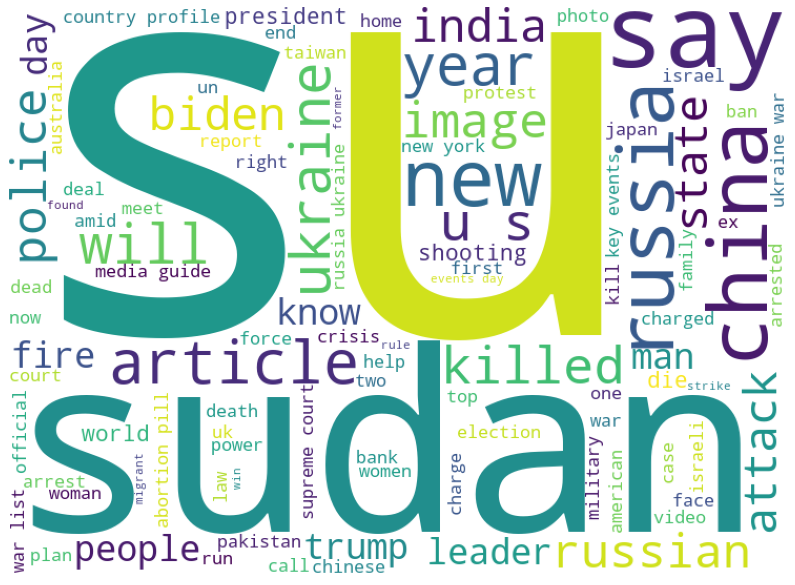

In [129]:
wordcloud_generator(df_real, 'Visualizations/Real_headlines_wordcloud.png')


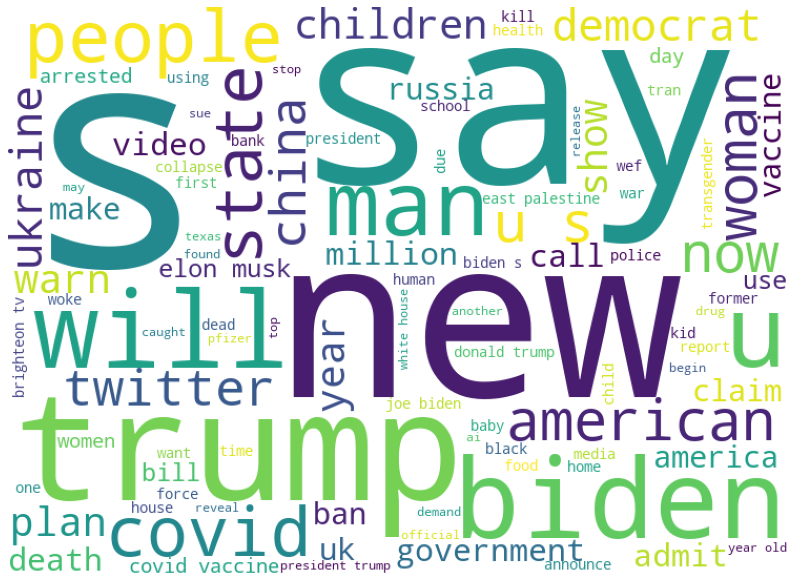

In [130]:
wordcloud_generator(df_fake, 'Visualizations/Fake_headlines_wordcloud.png')


In [131]:
bigrams_l = []
for list_b in df['bigrams'].values:
    for ngram in list_b:
        bigrams_l.append(ngram)

trigrams_l = []
for list_t in df['trigrams'].values:
    for ngram in list_t:
        trigrams_l.append(ngram)


In [32]:
def n_gram_graph(df_col, threshold = 5, top=0, size=(10,10), where='whole ENGLISH dataset'):
    l = []
    for arr in df_col.values:
        for list in arr:
            for ngram in list:
                l.append(ngram)
    
    ngrams = pd.Series(l)
    ngrams_sorted = ngrams.value_counts()
    ngrams_sorted = ngrams_sorted[ngrams_sorted > threshold][:top].sort_values(ascending=True)
    title = f'Most frequent {df_col.columns[0]} in {where}'
    ngrams_sorted.plot(kind='barh', title=title, figsize=size)
    plt.savefig(f'Visualizations\{title}')
    ngram_freq = pd.Series(ngrams_sorted.sort_values(ascending=False))
    ngram_freq = pd.DataFrame(ngram_freq, columns=['Frequency']).iloc[:15]
    display(ngram_freq)
    


Frequency
new york                59
donald trump            58
article image           54
joe biden               50
elon musk               49
year old                46
east palestine          45
ukraine war             44
country profile         44
fox news                43
white house             39
supreme court           38
brighteon tv            37
media guide             37
president trump         36

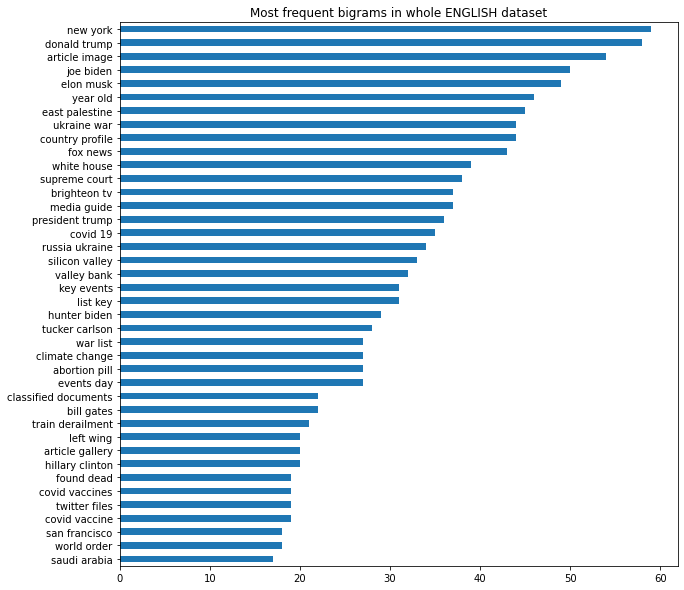

In [33]:
n_gram_graph(df[['bigrams']], threshold=2, top=40)

Frequency
silicon valley bank          32
list key events              31
russia ukraine war           31
ukraine war list             27
key events day               27
war list key                 27
new world order              15
chinese spy balloon          14
new york city                11
east palestine ohio           9
f kennedy jr                  8
al aqsa mosque                8
robert f kennedy              8
karine jean pierre            7
fight climate change          7

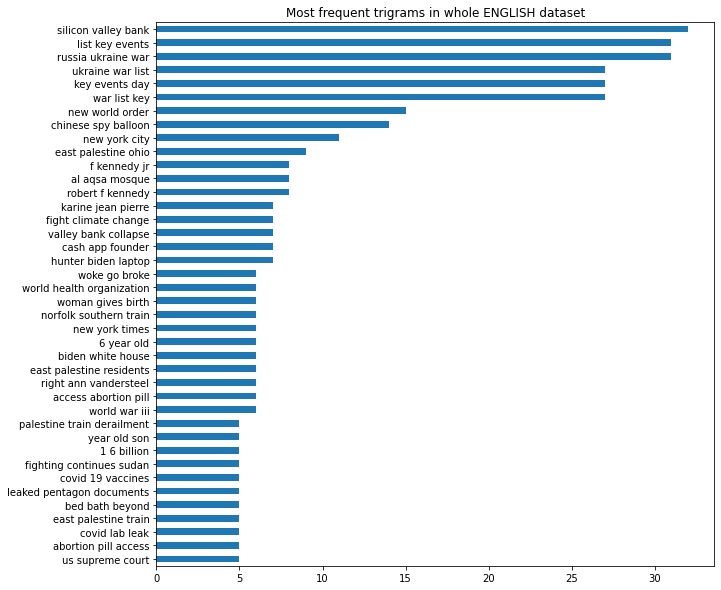

In [34]:
n_gram_graph(df[['trigrams']], threshold=2, top=40)

Frequency
article image           54
country profile         44
ukraine war             39
media guide             37
supreme court           35
russia ukraine          32
key events              31
new york                31
list key                31
war list                27
events day              27
abortion pill           27
fox news                22
article gallery         20
donald trump            19

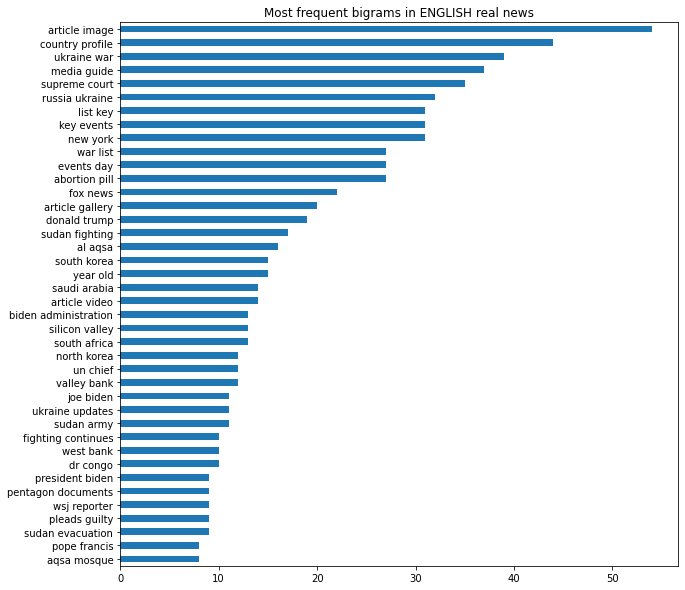

In [35]:
n_gram_graph(df[df['Rating'] == 1][['bigrams']], threshold=2, top=40, where='ENGLISH real news')

Frequency
elon musk                    45
east palestine               43
joe biden                    39
donald trump                 39
brighteon tv                 37
president trump              34
year old                     31
white house                  31
covid 19                     29
hunter biden                 28
new york                     28
tucker carlson               22
classified documents         22
bill gates                   22
climate change               21

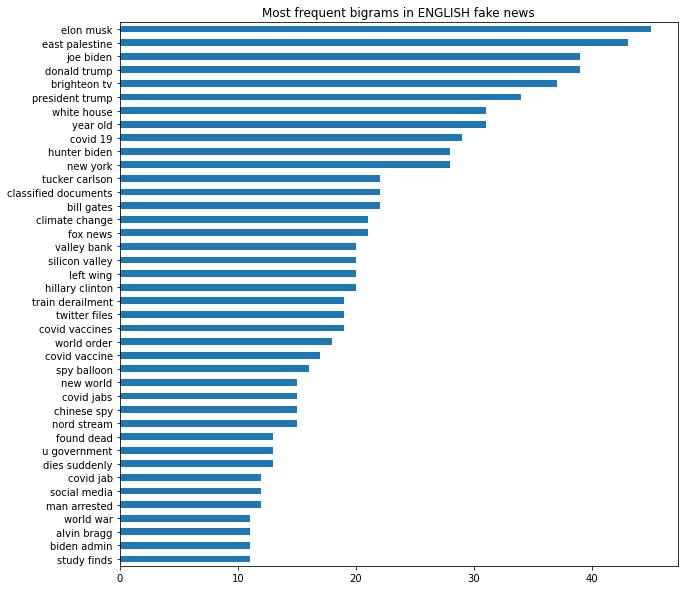

In [36]:
n_gram_graph(df[df['Rating'] == 0][['bigrams']], threshold=2, top=40, where='ENGLISH fake news')

Frequency
list key events                  31
russia ukraine war               30
ukraine war list                 27
key events day                   27
war list key                     27
silicon valley bank              12
al aqsa mosque                    8
new york city                     7
cash app founder                  6
access abortion pill              6
6 year old                        5
abortion pill access              5
1 6 billion                       5
us supreme court                  5
fighting continues sudan          5

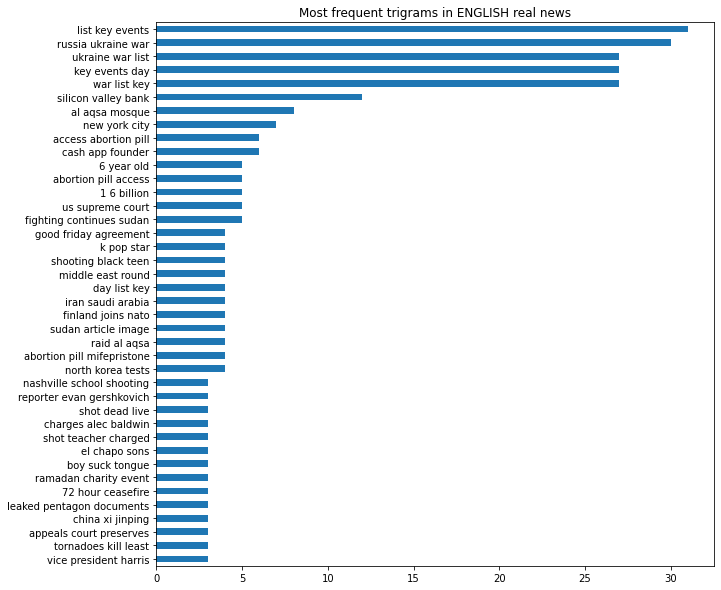

In [37]:
n_gram_graph(df[df['Rating'] == 1][['trigrams']], threshold=2, top=40, where='ENGLISH real news')

Frequency
silicon valley bank              20
new world order                  15
chinese spy balloon              14
east palestine ohio               9
hunter biden laptop               7
f kennedy jr                      7
fight climate change              7
robert f kennedy                  7
karine jean pierre                7
woman gives birth                 6
right ann vandersteel             6
woke go broke                     6
biden white house                 6
world war iii                     6
east palestine residents          6

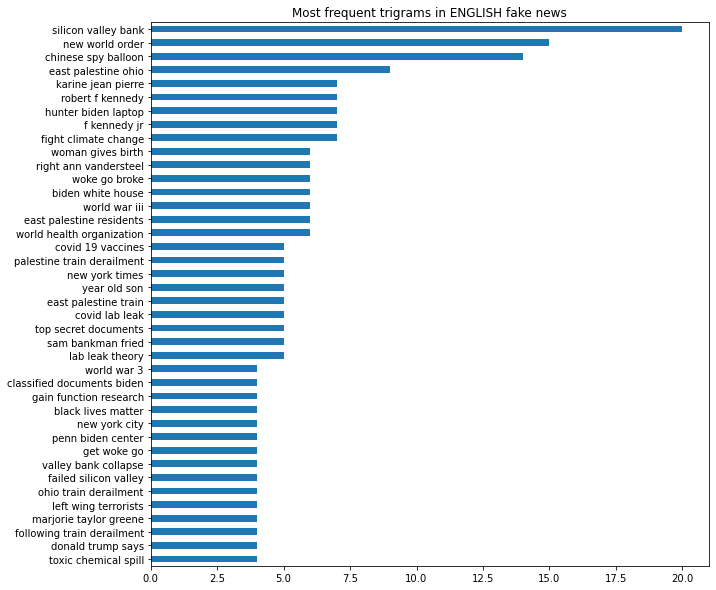

: 

In [38]:
n_gram_graph(df[df['Rating'] == 0][['trigrams']], threshold=2, top=40, where='ENGLISH fake news')

In [139]:
df.columns

Index(['Statement', 'Rating', 'cleaned', 'cleaned tokenized', 'tokens',
       'statement length', 'word count', 'sentence count', 'unique words',
       'lexical richness', 'punctuation count', 'capitalized words%',
       'period%', 'comma%', 'colon%', 'semicolon%', 'question mark%',
       'exclamation mark%', 'dash%', 'apostrophe%', 'open parenthesis%',
       'close parenthesis%', 'noun%', 'verbs%', 'present verbs%',
       'present 3rd verbs%', 'past participle verbs%', 'past tense verbs',
       'personal pronouns%', 'possessive pronouns%', 'wh pronouns%',
       'adverbs%', 'comparative adverbs%', 'superlative adverbs%',
       'wh adverbs%', 'adjectives%', 'comparative adjectives%',
       'superlative adjectives%', 'determiner%', 'foreign%',
       'preposition/conjunction%', 'interjection%', 'modal auxilliary%',
       'numerical%', 'sexual anatomy / sexual acts',
       'bodily fluids / excrement', 'sexual orientation / gender',
       'racial / ethnic slurs', 'animal refer

In [140]:
df_ling_dim = df[['word count', 'sentence count', 'unique words', 'lexical richness', 'capitalized words%', 'Rating']]

df_punc_data = df[['punctuation count', 'period%', 'comma%', 'colon%', 
    'semicolon%', 'question mark%', 
    'exclamation mark%', 'dash%', 'apostrophe%', 
    'open parenthesis%', 'close parenthesis%', 'Rating']]


df_otherpos_data = df[['noun%', 'determiner%', 'foreign%', 'preposition/conjunction%', 'interjection%', 'modal auxilliary%', 'numerical%', 'Rating']]

df_verb_data = df[['verbs%', 'present verbs%', 'present 3rd verbs%', 'past participle verbs%', 'past tense verbs', 'Rating']]

df_pronoun_data = df[['personal pronouns%', 'possessive pronouns%', 'wh pronouns%', 'Rating']]

df_adverb_data = df[['adverbs%', 'comparative adverbs%', 'superlative adverbs%', 'wh adverbs%', 'Rating']]

df_adj_data = df[['adjectives%', 'comparative adjectives%', 'superlative adjectives%', 'Rating']]

df_informality_data = df[['sexual anatomy / sexual acts',
       'bodily fluids / excrement', 'sexual orientation / gender',
       'racial / ethnic slurs', 'animal references',  'internet slang', 'profanity_level', 'Rating']]

# df_emotional_data = df[['Happy', 'Angry', 
#     'Surprise', 'Sad', 
#     'Fear', 'Rating']] 

In [141]:
from varname import nameof
df_list = [df_ling_dim, df_punc_data, df_otherpos_data, df_verb_data, df_pronoun_data, df_adverb_data, df_adj_data, df_informality_data]
df_list_names = ['language dimensions', 'punctuation data', 'otherPOS data', 'verb data', 'pronoun data', 'adverb data', 'adjective data', 'informality data']

dfs_real = {}
dfs_fake = {}

for _df, dfname in zip(df_list, df_list_names):
    dfs_real[dfname] = _df[_df['Rating'] == 1]
    dfs_fake[dfname] = _df[_df['Rating'] == 0]



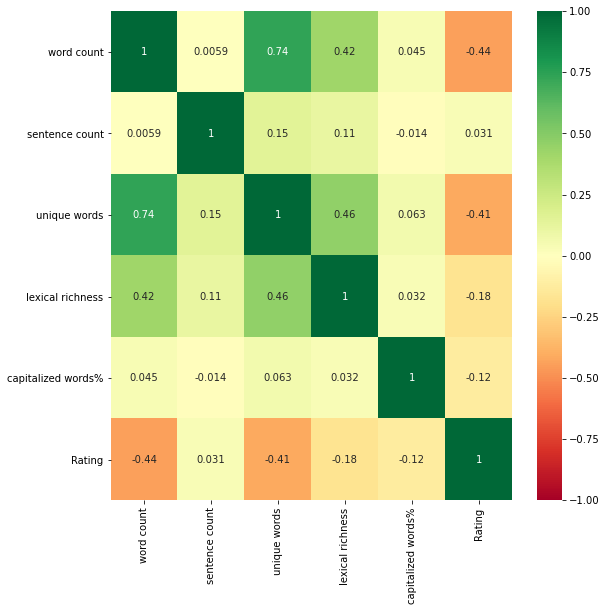

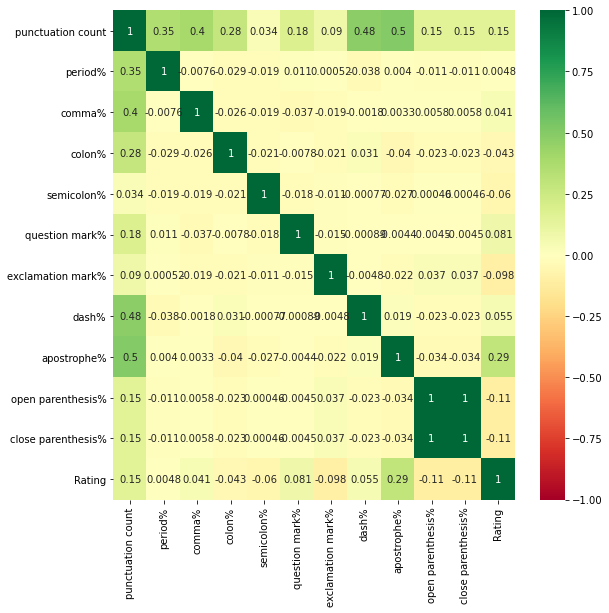

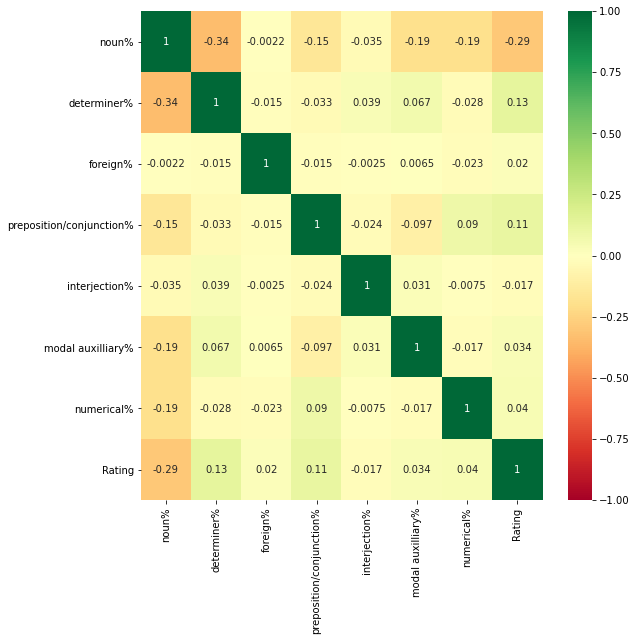

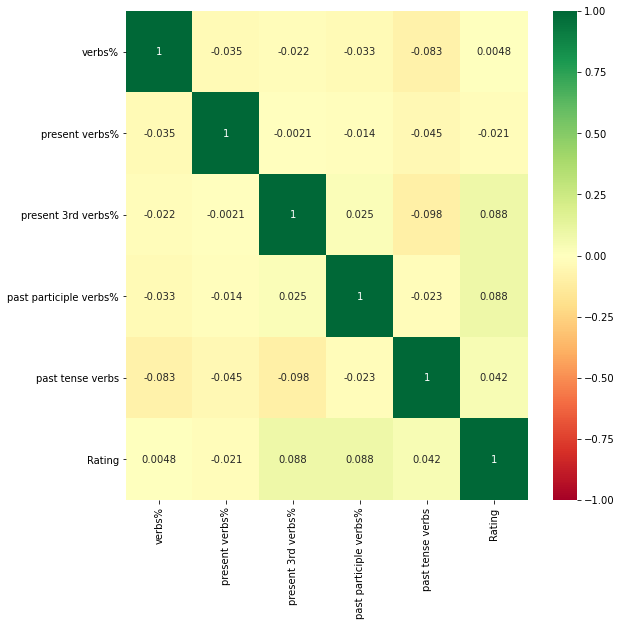

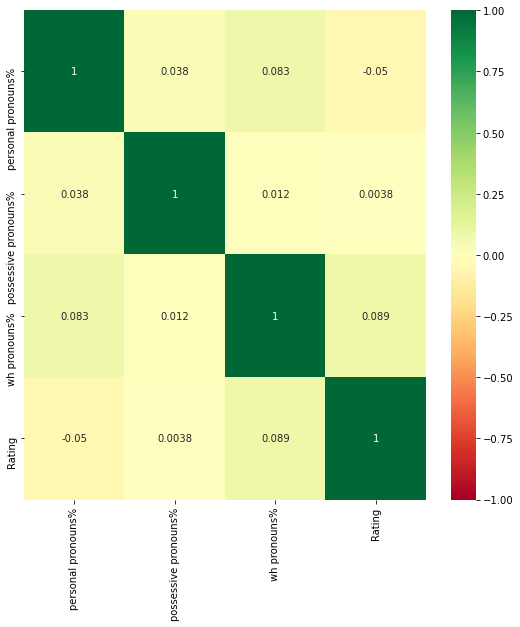

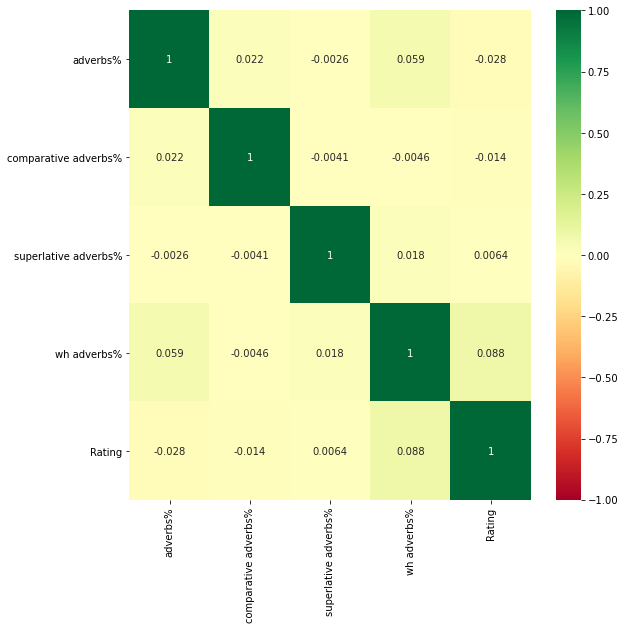

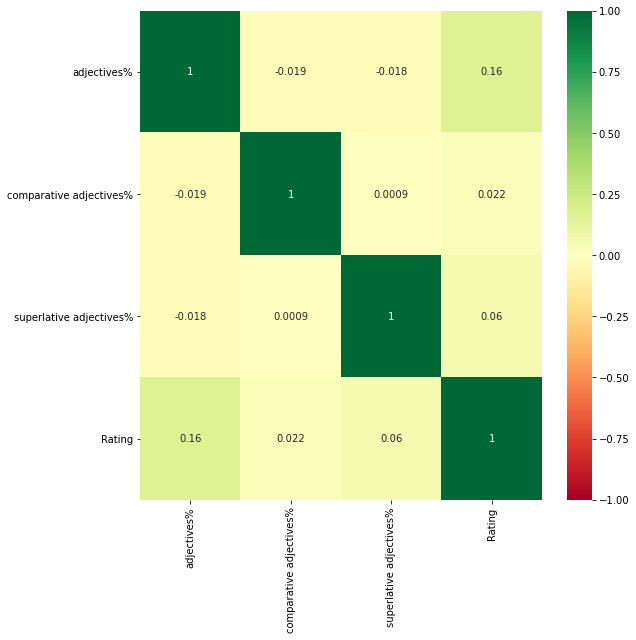

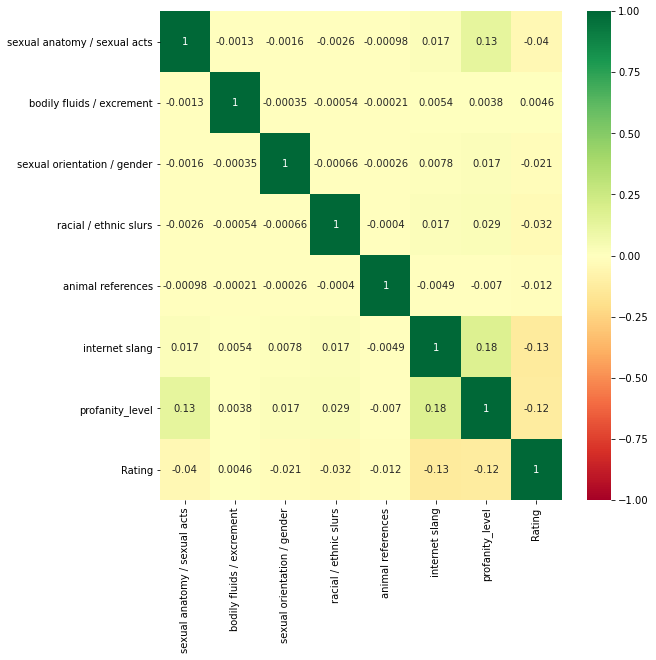

In [142]:
import seaborn as sns

for _df in df_list:
    corrmat = _df.corr()
    top_corr_features = corrmat.index
    plt.figure(figsize = (9,  9))
    g = sns.heatmap(_df[top_corr_features].corr(), vmin=-1, vmax=1, annot=True , cmap = 'RdYlGn')

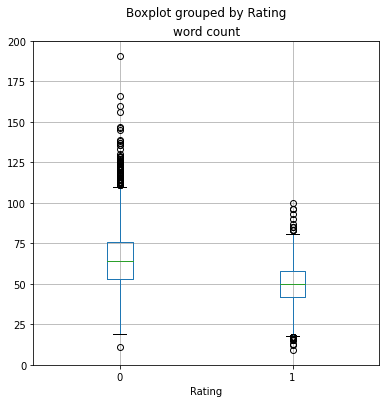

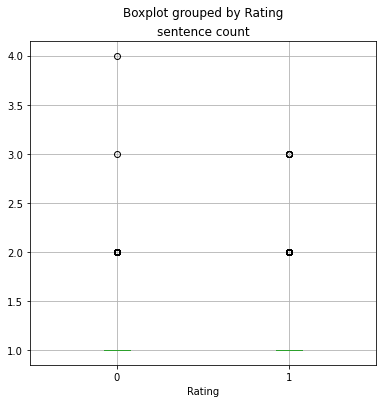

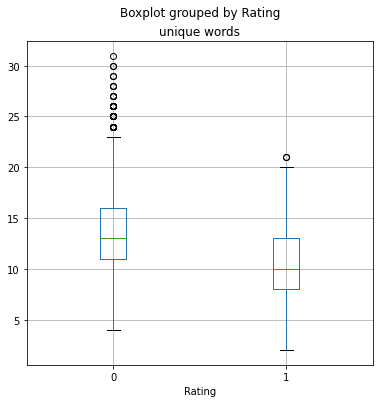

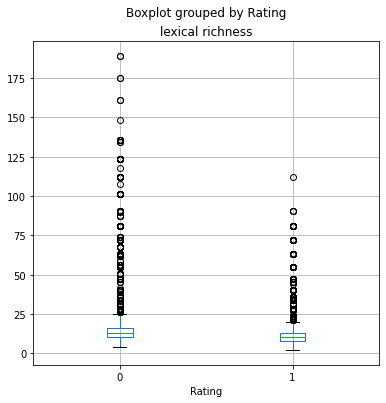

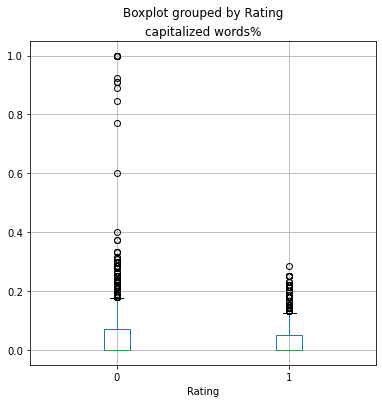

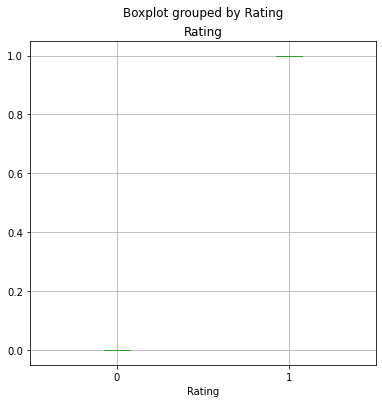

In [143]:
for col in df_ling_dim.columns:
    df_ling_dim.boxplot(column = col, by = 'Rating', figsize = (6, 6))

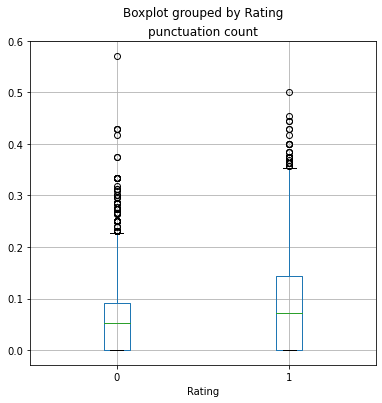

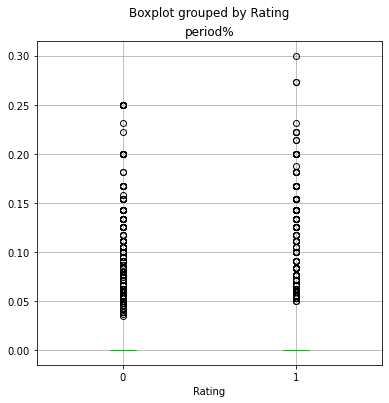

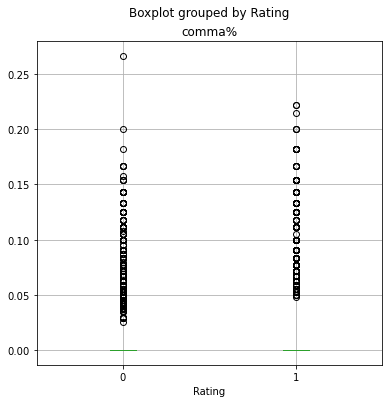

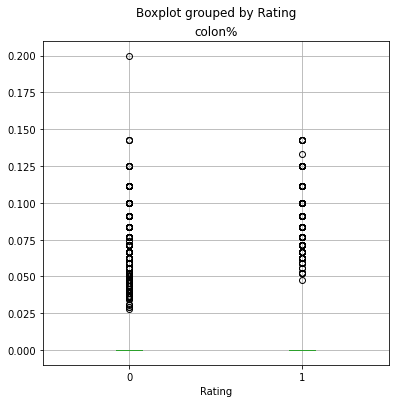

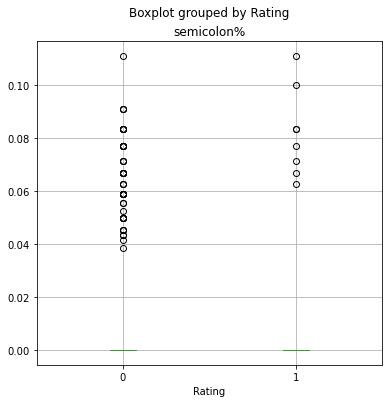

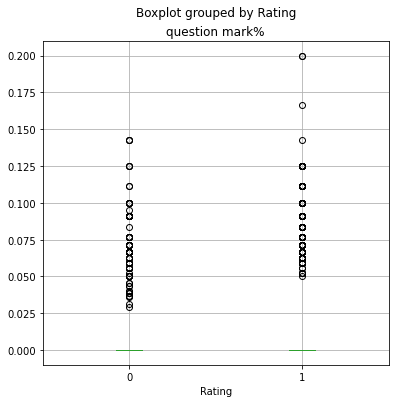

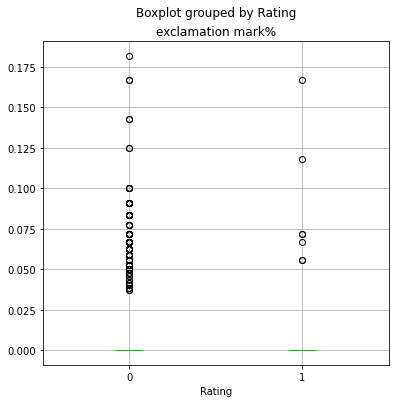

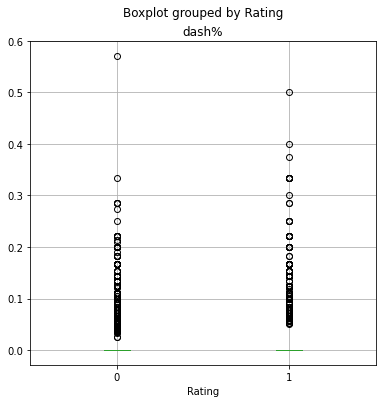

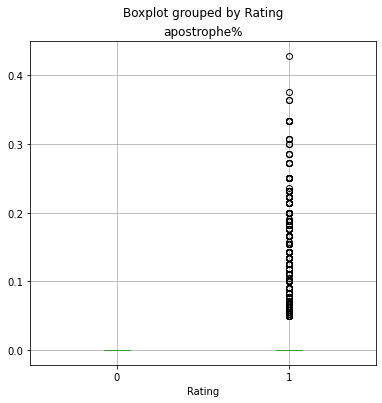

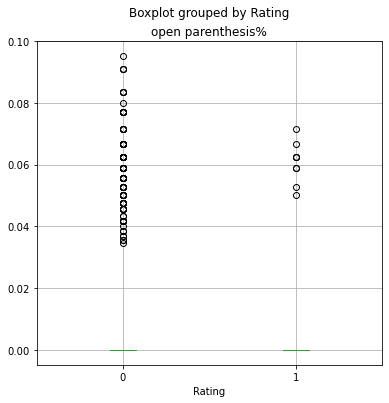

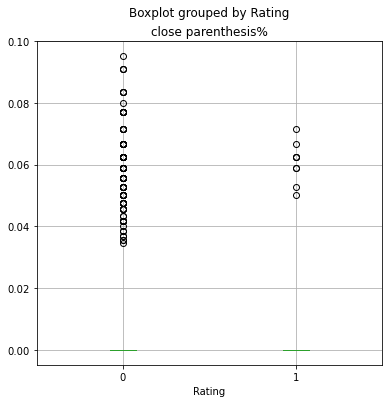

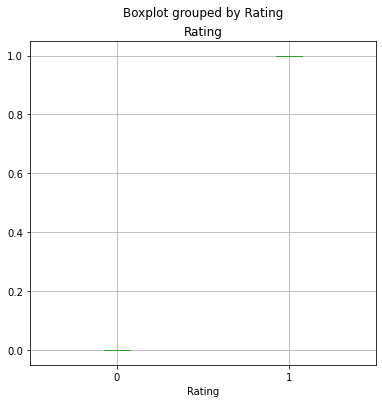

In [144]:
for col in df_punc_data.columns:
    df_punc_data.boxplot(column = col, by = 'Rating', figsize = (6, 6))

c:\Users\cvaal\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:196: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


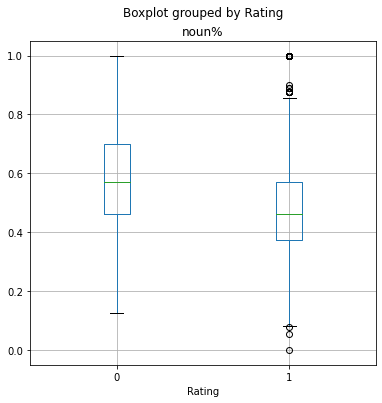

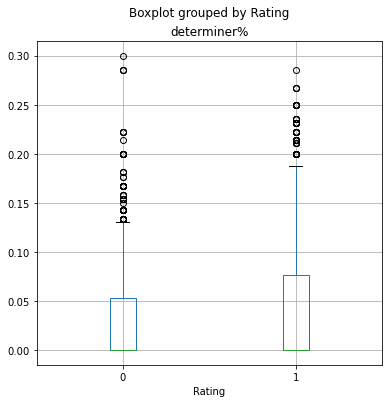

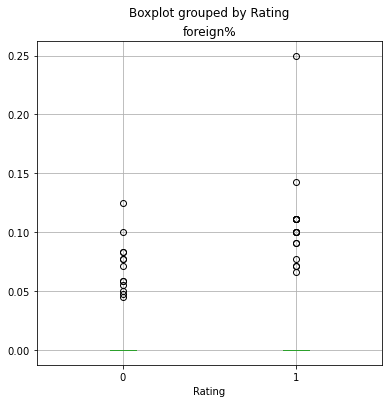

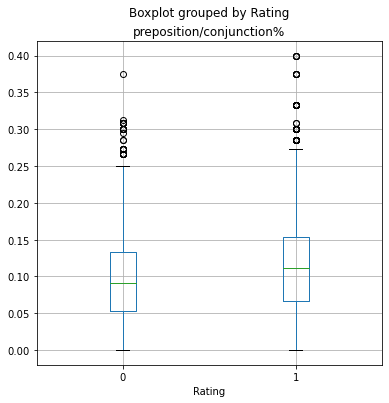

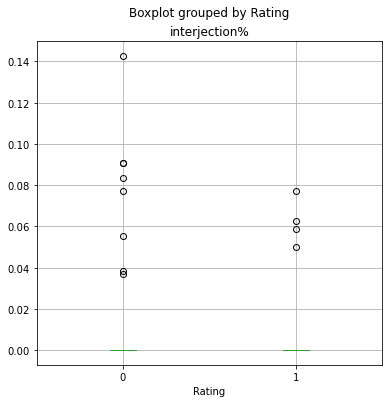

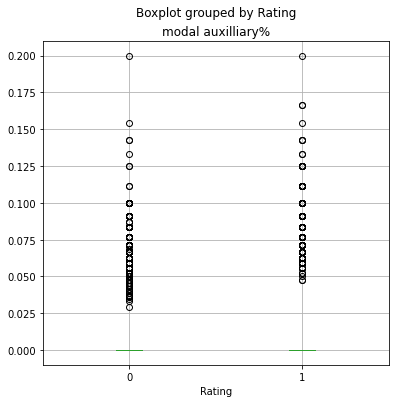

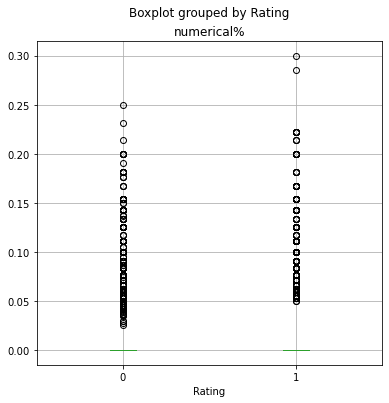

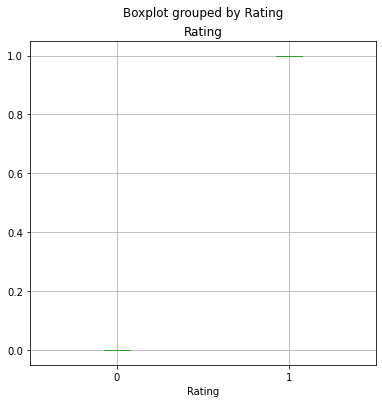

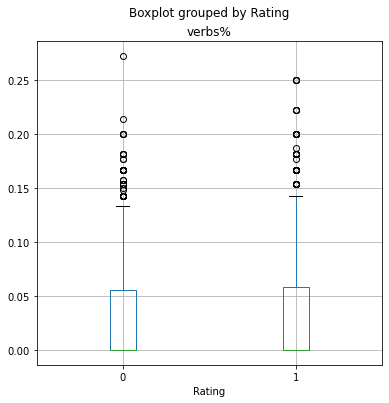

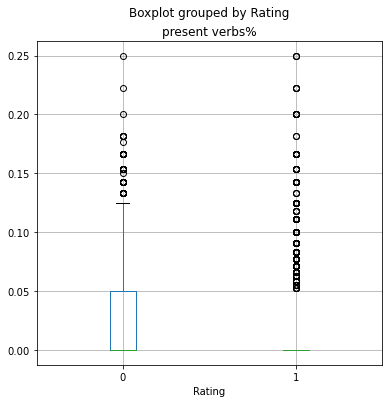

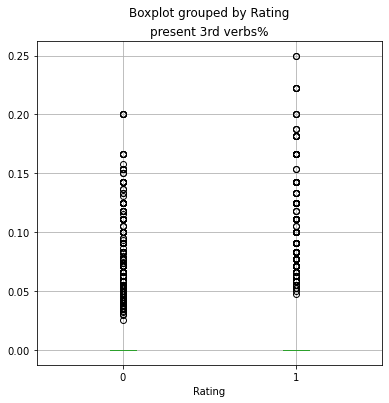

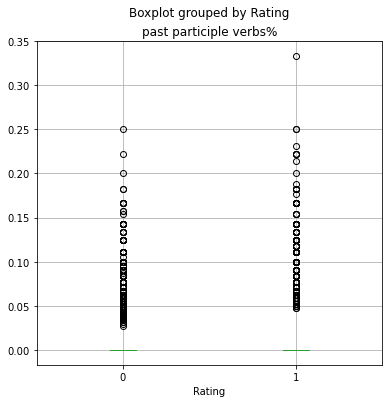

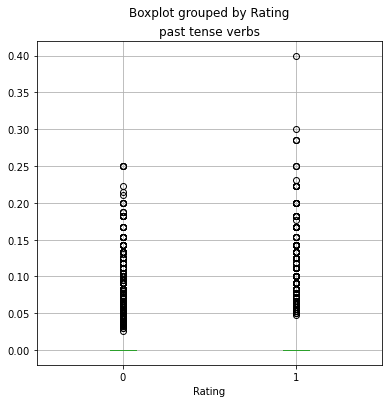

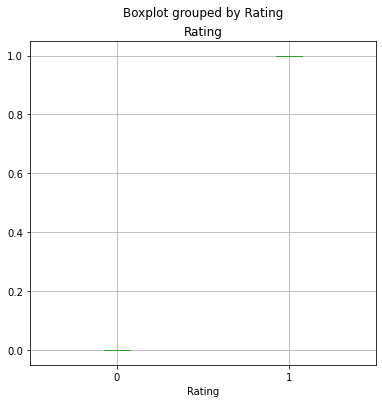

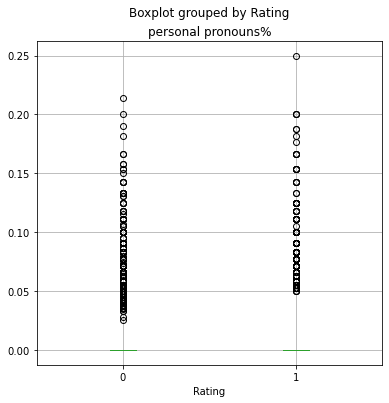

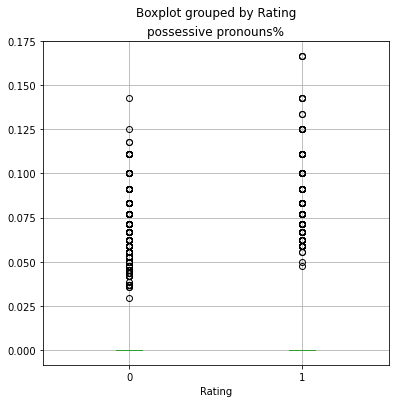

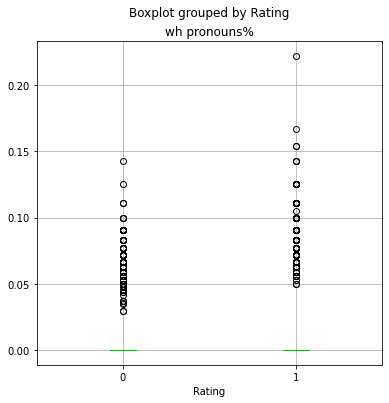

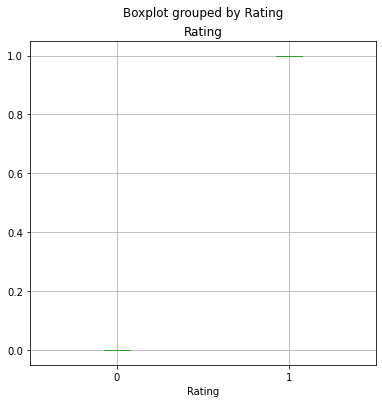

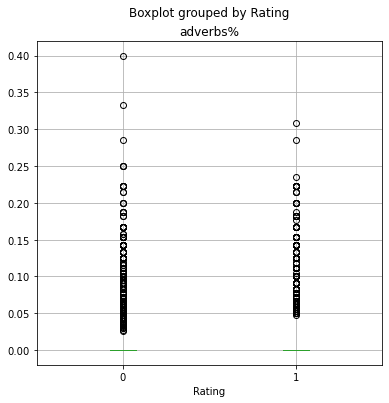

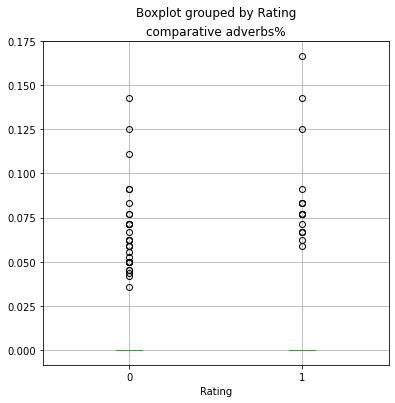

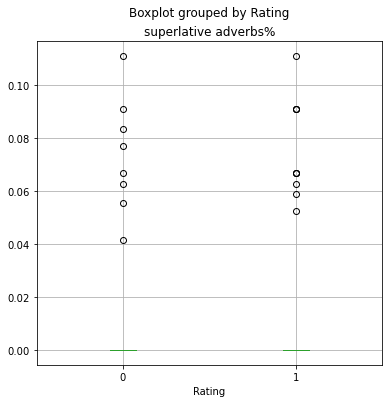

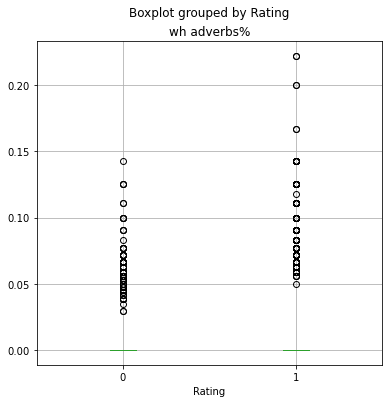

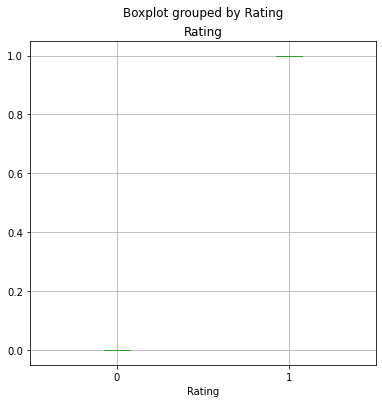

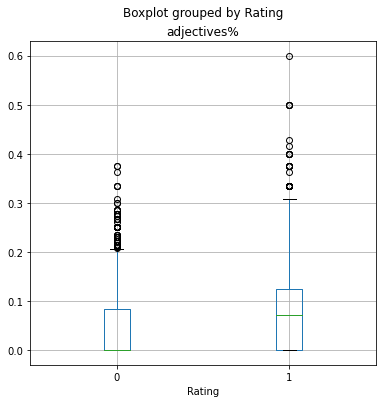

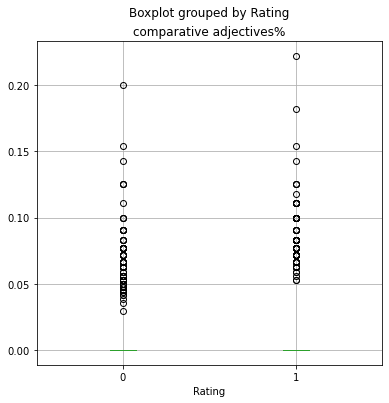

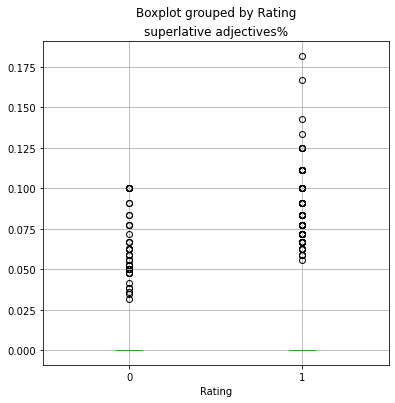

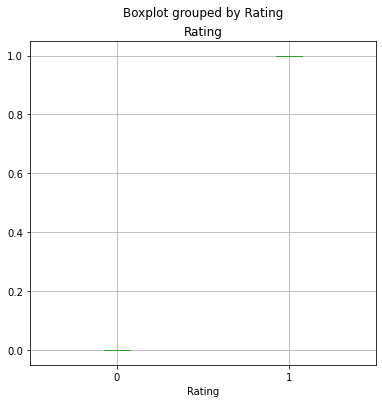

In [157]:
df_pos_comb = [df_otherpos_data, df_verb_data, df_pronoun_data, df_adverb_data, df_adj_data]
for _df in df_pos_comb:
    for col in _df:
        _df.boxplot(column = col, by = 'Rating', figsize = (6, 6))

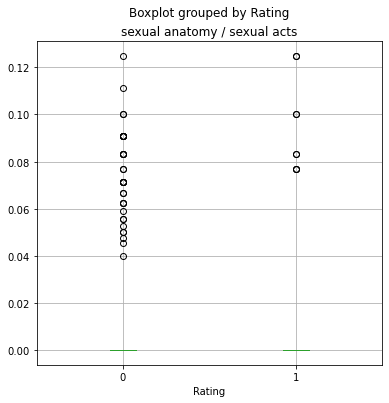

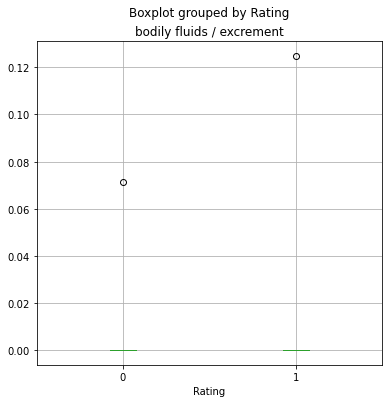

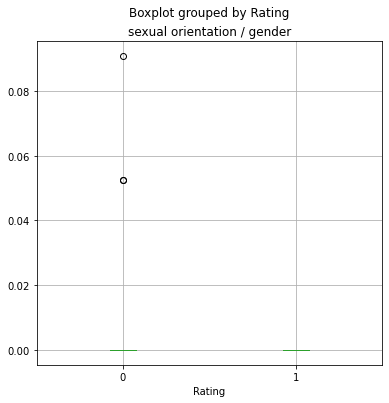

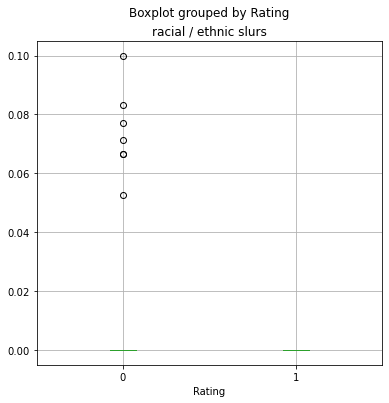

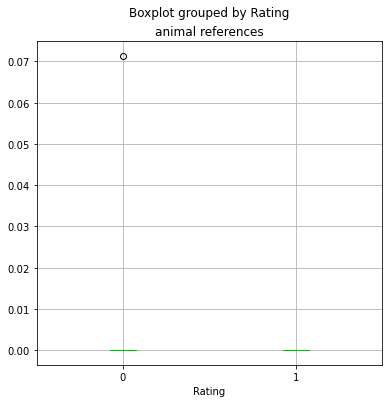

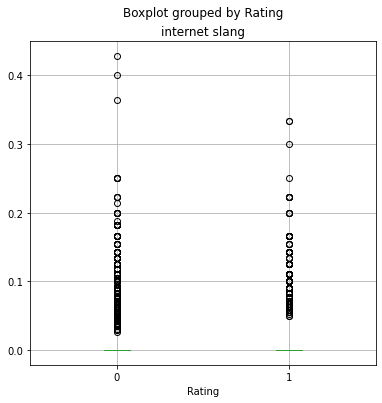

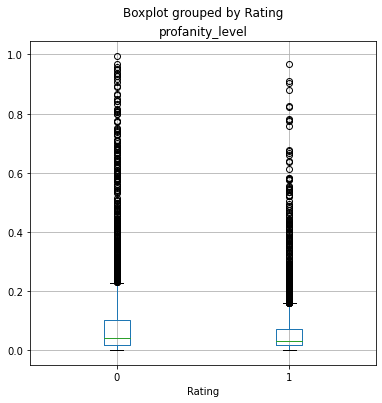

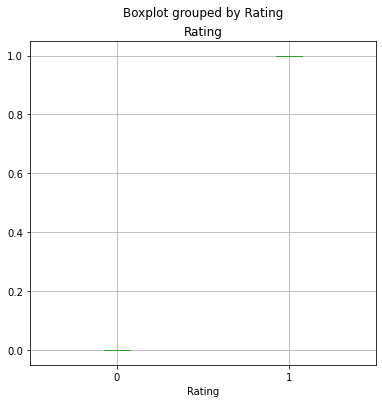

In [146]:
for col in df_informality_data.columns:
    df_informality_data.boxplot(column = col, by = 'Rating', figsize = (6, 6))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

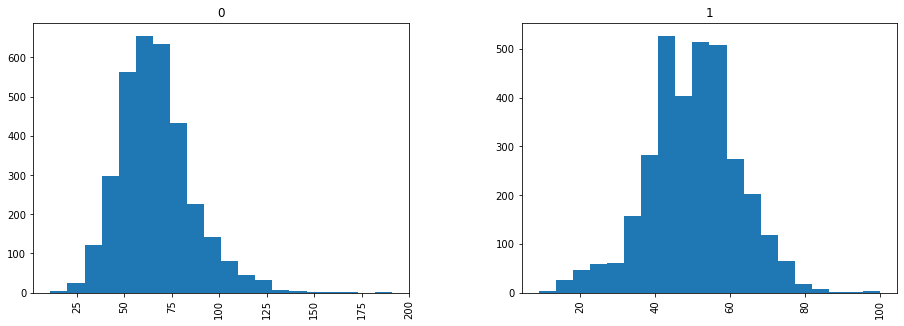

In [147]:
df_ling_dim.hist("word count", by='Rating', bins =20, figsize=(15,5))

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

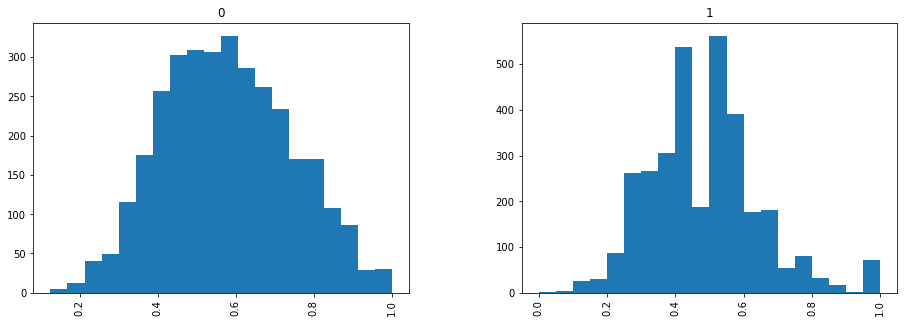

In [148]:
df_otherpos_data.hist('noun%', by='Rating', bins =20, figsize=(15,5))

In [149]:
df_new = pd.read_pickle('English_Headlines_EngFeatures.pkl')

In [150]:
type(df_new['bigrams'].values[0])

list

In [151]:
df_new2 = pd.read_csv('English_Headlines_EngFeatures.csv')
df_new2['bigrams'].values

array(["['changing clocks', 'clocks health', 'health hazard', 'hazard ask', 'ask sleep', 'sleep doctor']",
       "['alec baldwin', 'baldwin fatal', 'fatal film', 'film set', 'set shooting', 'shooting unfolded']",
       "['90 year', 'year old', 'old tortoise', 'tortoise named', 'named mr', 'mr pickles', 'pickles became', 'became father', 'father 3', '3 big', 'big dill']",
       ...,
       "['justin trudeau', 'trudeau announces', 'announces 5', '5 5', '5 million', 'million censor', 'censor independent', 'independent media']",
       "['rasmussen final', 'final generic', 'generic congressional', 'congressional ballot', 'ballot 48', '48 gop', 'gop 43', '43 dem', 'dem gop', 'gop 13', '13 independent', 'independent voters']",
       "['kevin mccarthy', 'mccarthy caves', 'caves expected', 'expected appoints', 'appoints ilhan', 'ilhan omar', 'omar house', 'house foreign', 'foreign affairs', 'affairs committee']"],
      dtype=object)